In [109]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import pendulum
from PIL import Image
import pickle

from ipywidgets import IntProgress
from IPython.display import display, clear_output

try:
  import google.colab
  from google.colab import drive, files
  runnin_in_colab = True
except:
  runnin_in_colab = False

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

In [108]:
xls_dir="UT_Smoking_Data"
pickles_dir="UT_Smoking_Data_pickles"
x_dir="UT_Smoking_Data_x"

In [118]:
#rewrite xlsx files into pickles with only acclero data (+human readable timestamps) + classes
#grab 'em hire owerwise https://drive.google.com/file/d/1SWNHKtcx0aJnRPbf-zT5CJb46ERRIvgr/view?usp=share_link
 
make_pickles=False

def static_vars(**kwargs):
    def decorate(func):
        for k in kwargs:
            setattr(func, k, kwargs[k])
        return func
    return decorate

@static_vars(pred_val=-1.0)
def to_ts(x):
  try:
    f_msecs=float(str(x))
    to_ts.pred_val=f_msecs
  except:
    f_msecs=to_ts.pred_val
    print("wrong ts data: {}, reset it to {}".format(str(x), f_msecs))
    
  return pendulum.from_timestamp(f_msecs/1000.0)
                                  
def apply_complex_function(x):                                
  return to_ts(x['timestamp_WD'])

raw_ds_index = {
     0:'timestamp_WD', 
     1:'Accelerometer_x_WD', 
     2:'Accelerometer_y_WD', 
     3:'Accelerometer_z_WD', 
     4:'Linear_acceleration_sensor_x_WD', 
     5:'Linear_acceleration_sensor_y_WD', 
     6:'Linear_acceleration_sensor_z_WD', 
     7:'Gyroscope_x_WD', 
     8:'Gyroscope_y_WD', 
     9:'Gyroscope_z_WD',
    10:'Magnetometer_x_WD', 
    11:'Magnetometer_y_WD', 
    12:'Magnetometer_z_WD', 
    13:'Pressure_sensor_WD', 
    14:'Heart_rate_sensor_WD',
    15:'GAP', 
    16:'sevtimestamp_PD', 
    17:'Accelerometer_x_PD', 
    18:'Accelerometer_y_PD',
    19:'Accelerometer_z_PD',
    20:'Linear_acceleration_sensor_x_PD', 
    21:'Linear_acceleration_sensor_y_PD', 
    22:'Linear_acceleration_sensor_z_PD', 
    23:'Gyroscope_x_PD', 
    24:'Gyroscope_y_PD',
    25:'Gyroscope_z_PD', 
    26:'Magnetometer_x_PD', 
    27:'Magnetometer_y_PD', 
    28:'Magnetometer_z_PD', 
    29:'GPS_lat_PD',
    30:'GPS_long_PD', 
    31:'Class_label'}

pickle_index=['timestamp_WD', 
              'Accelerometer_x_WD', 
              'Accelerometer_y_WD', 
              'Accelerometer_z_WD', 
              'Linear_acceleration_sensor_x_WD', 
              'Linear_acceleration_sensor_y_WD', 
              'Linear_acceleration_sensor_z_WD', 
              'Gyroscope_x_PD', 'Gyroscope_y_PD', 
              'Gyroscope_z_PD',
              'Class_label' ]

categ_colname='Class_label'

if make_pickles:
    
    if not os.path.isdir(xls_dir):
        raise("xls dir {} doesnt exist".format(xls_dir))
    
    if not os.path.isdir(pickles_dir):
        print("pickles dir {} doesnt exist, creating it".format(pickles_dir))
        os.mkdir(pickles_dir)
        
    for f_in in os.listdir(xls_dir):  
       
       if not f_in.endswith('.xlsx') : continue 

       f_out=f_in.replace(".xlsx", ".pickle")
       print("processing {} to {}".format(f_in, f_out))

       f_in = os.path.join(xls_dir, f_in)

       print("reading raw {}".format(f_in))
       data = pd.read_excel(f_in, header=None)
       print("got {} rows".format(len(data)))

       try:
         data_rn = data.rename(raw_ds_index, axis=1); del data
         data = data_rn[pickle_index].copy() ; del data_rn
        
         print("start conv msecs ts to dt on...")
         data['timestamp_WD']=data.apply(apply_complex_function, axis=1)

         f_out=os.path.join(pickles_dir, f_out)
         print("writng pickle {}".format(f_out))
         data.to_pickle(f_out) 

       except: 
         print("failed on {}".format(f_out))
         pass

In [3]:
#for dataviz only...
participant="Participant1"
data = pd.read_pickle('{}/{}_Data.pickle'.format(pickles_dir, participant))

In [39]:
data.shape

(904400, 8)

In [11]:
data.head(5)

timestamp_WD  Accelerometer_x_WD  Accelerometer_y_WD  \
0 2016-02-12 11:57:51.218000+00:00           -5.973572           -6.710114   
1 2016-02-12 11:57:51.238000+00:00           -5.980713           -6.838654   
2 2016-02-12 11:57:51.258000+00:00           -6.025940           -6.895783   
3 2016-02-12 11:57:51.279000+00:00           -5.956909           -7.031464   
4 2016-02-12 11:57:51.298000+00:00           -5.959290           -6.900543   

   Accelerometer_z_WD  Linear_acceleration_sensor_x_WD  \
0            2.555145                        -0.474457   
1            2.605133                        -0.471420   
2            2.514679                        -0.504273   
3            2.752716                        -0.424346   
4            2.743195                        -0.414628   

   Linear_acceleration_sensor_y_WD  Linear_acceleration_sensor_z_WD  \
0                         0.382236                         0.345239   
1                         0.249793                         0.383285   
2                         0.187889                         0.285115   
3                         0.048824                         0.503679   
4                         0.176953                         0.475054   

   Gyroscope_x_PD  Gyroscope_y_PD  Gyroscope_z_PD Class_label  
0        0.038790        0.006414       -0.004276     SmokeSD  
1        0.037568        0.025351       -0.010079     SmokeSD  
2        0.033292        0.027184       -0.009774     SmokeSD  
3        0.021380        0.025351       -0.009774     SmokeSD  
4        0.023824        0.053145       -0.015577     SmokeSD

In [16]:
np.sort(data['Class_label'].unique())

array(['DrinkSD', 'DrinkST', 'Eat', 'Sit', 'SmokeSD', 'SmokeST', 'Stand'],
      dtype=object)

In [26]:
#lets build jpegs from sensor data, it's fun for feature engineering...
#here we work just on a single participant

def to_255(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data)) * 255

sensor="accel_lin"

# our rgb-likes & sensor weights
if sensor == "accel" :  
  sensors=['Accelerometer_x_WD', 
           'Accelerometer_y_WD', 
           'Accelerometer_z_WD'] 
  sensors_weights={ "Accelerometer_x_WD": 5.0, 
                    "Accelerometer_y_WD": 5.0, 
                    "Accelerometer_z_WD": 1.0 }

if sensor == "accel_lin" :  
  sensors=['Linear_acceleration_sensor_x_WD', 
           'Linear_acceleration_sensor_y_WD', 
           'Linear_acceleration_sensor_z_WD'] 
  sensors_weights={ "Linear_acceleration_sensor_x_WD": 1.0,
                    "Linear_acceleration_sensor_y_WD": 1.0, 
                    "Linear_acceleration_sensor_z_WD": 1.0 }

if sensor == "gyro" :
  sensors=['Gyroscope_x_PD', 
           'Gyroscope_y_PD', 
           'Gyroscope_z_PD'] 
  sensors_weights={ "Gyroscope_x_PD": 1.0, 
                    "Gyroscope_y_PD": 1.0, 
                    "Gyroscope_z_PD": 5.0 }
    
sampling=50 #sampling rate
win_len=50  #wind size in secs

n_sensors = len(sensors) #outta be [1,3] for images...

tot_frame_len=sampling*win_len

act_types=np.sort(data[categ_colname].unique())
n_act_types=len(act_types)

#build images lists
act_rgb={} #images per activity 

max_count = int(len(data)/tot_frame_len)
print("expecting approx {} images in total...".format(max_count))

pbar = IntProgress(min=0, max=max_count) 
display(pbar) 

for act_type in act_types :
  data_cursor = data[(data[categ_colname] == act_type)]  
  data_act_type_len=len(data_cursor)-tot_frame_len
                         
  if data_act_type_len < tot_frame_len : 
     print("start skipping {} cur not enugh for at least 1 frame...".format(act_type))
     continue
                         
  act_rgb[act_type]=[]

  max_count_act = int(len(data_cursor)/tot_frame_len)
  print("expecting approx {} {} images in total...".format(act_type, max_count_act))
    
  nth_frame=0     
  while True:  
    cur_pos=nth_frame*tot_frame_len
    if cur_pos > data_act_type_len :  break
                         
    data_tmp=data_cursor[nth_frame*tot_frame_len:(nth_frame+1)*tot_frame_len] 
    
    #fill rgb frame from data_tmp...
    raw_data = []                          
    for nth_sec in range(0,win_len):
      for nrow in range(0,sampling):
         try:
           row=data_tmp.iloc[win_len*nth_sec+nrow] 
         except:
           print(win_len*nth_sec+nrow)
           raise("error")
            
         for fld in sensors:
            raw_data.append(row[fld] * sensors_weights[fld])

    act_rgb[act_type].append(Image.fromarray(np.array(to_255(raw_data), dtype=np.uint8).reshape(sampling, win_len, n_sensors))) 
    nth_frame+=1
        
    pbar.value += 1   
    if pbar.value % 20 == 0:
       print("{} images of {}".format(20, act_type))
            
  print("processed {} frames of {}".format(nth_frame, act_type))

expecting approx 361 images in total...


IntProgress(value=0, max=361)

50 images of DrinkSD
processed 51 frames of DrinkSD
50 images of DrinkST
processed 51 frames of DrinkST
50 images of Eat
processed 51 frames of Eat
50 images of Sit
processed 51 frames of Sit
50 images of SmokeSD
processed 51 frames of SmokeSD
50 images of SmokeST
processed 51 frames of SmokeST
50 images of Stand
processed 51 frames of Stand


In [7]:
for act_type in act_types :    
  print("made {} frames for activty {}".format(len(act_rgb[act_type]), act_type))

made 51 frames for activty SmokeSD
made 51 frames for activty SmokeST
made 51 frames for activty Eat
made 51 frames for activty DrinkSD
made 51 frames for activty DrinkST
made 51 frames for activty Sit
made 51 frames for activty Stand


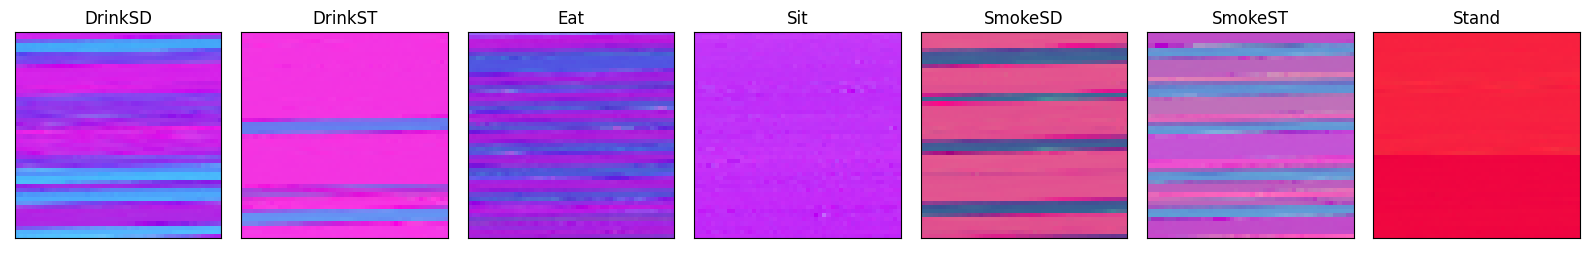

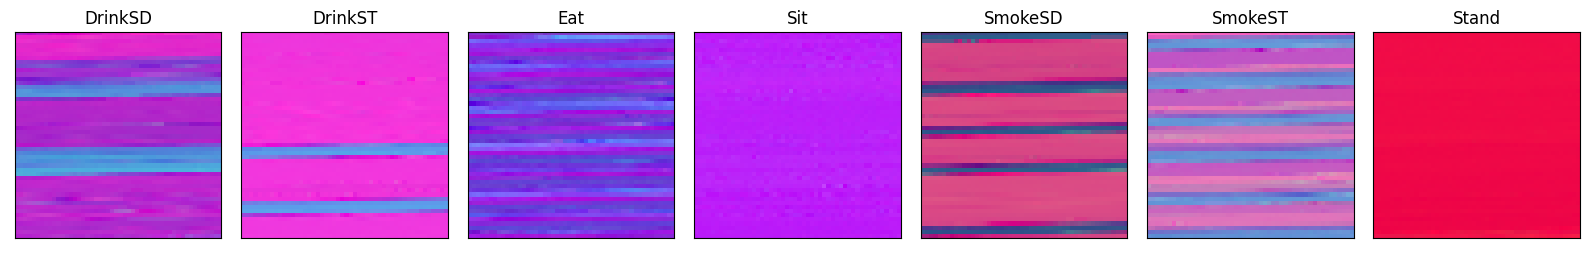

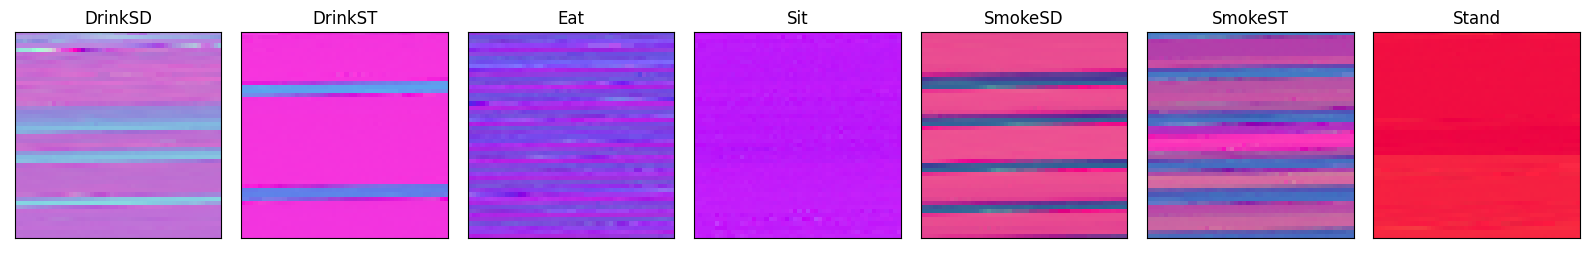

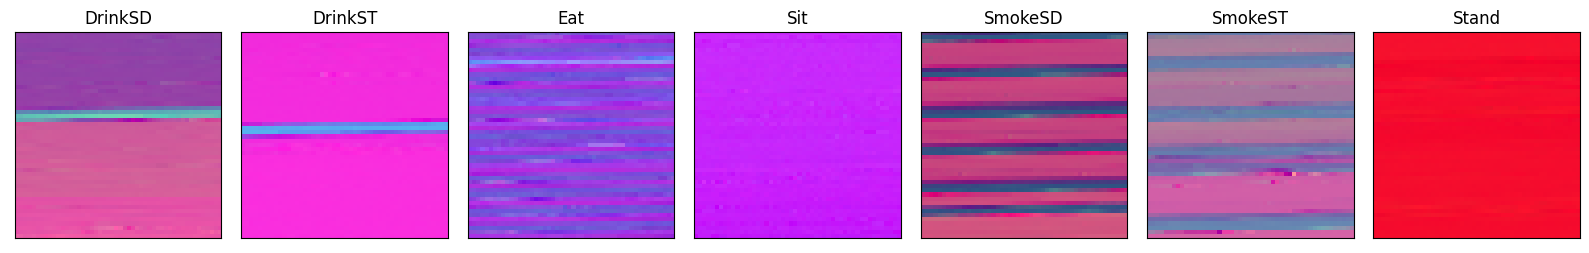

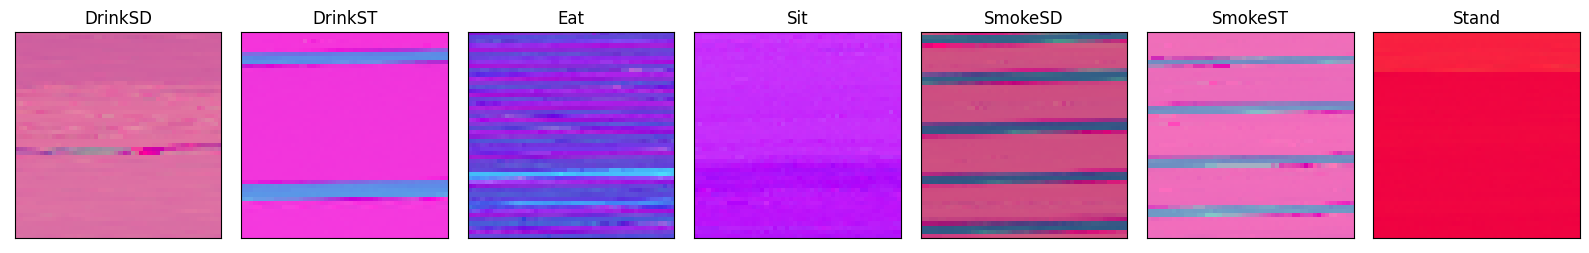

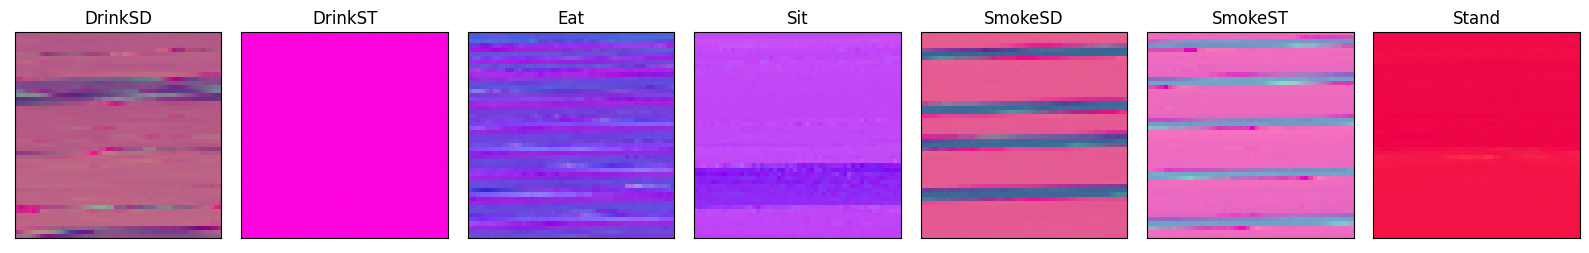

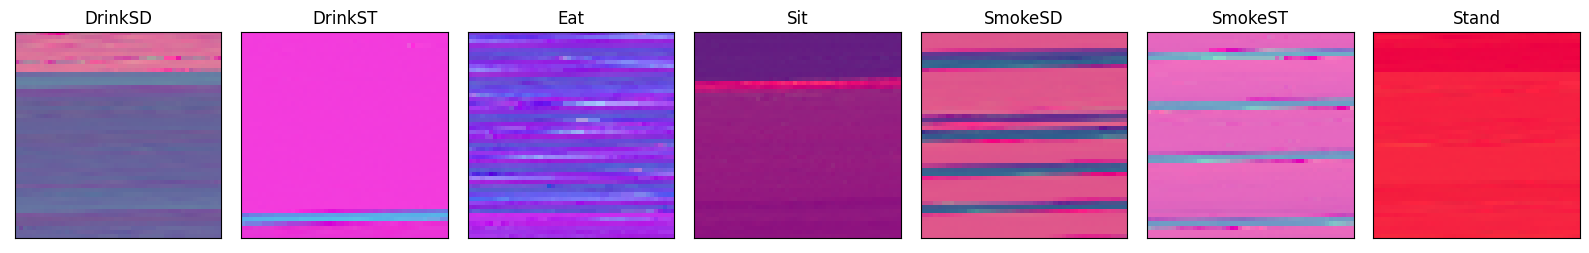

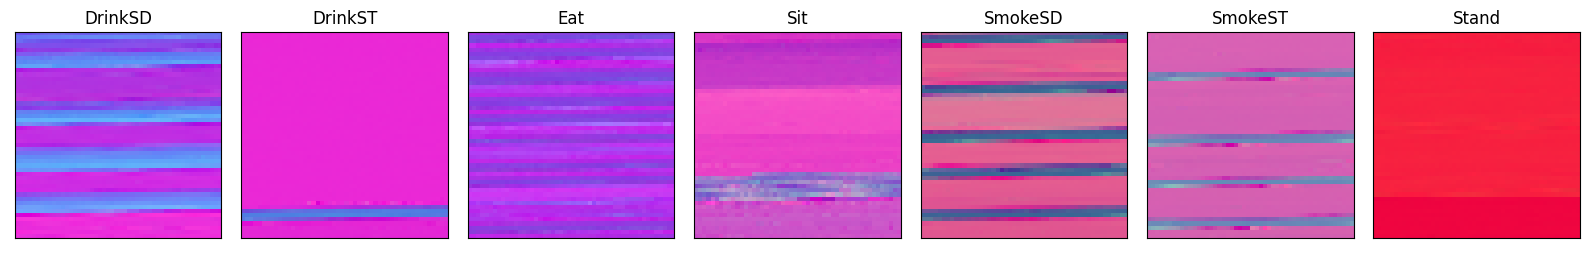

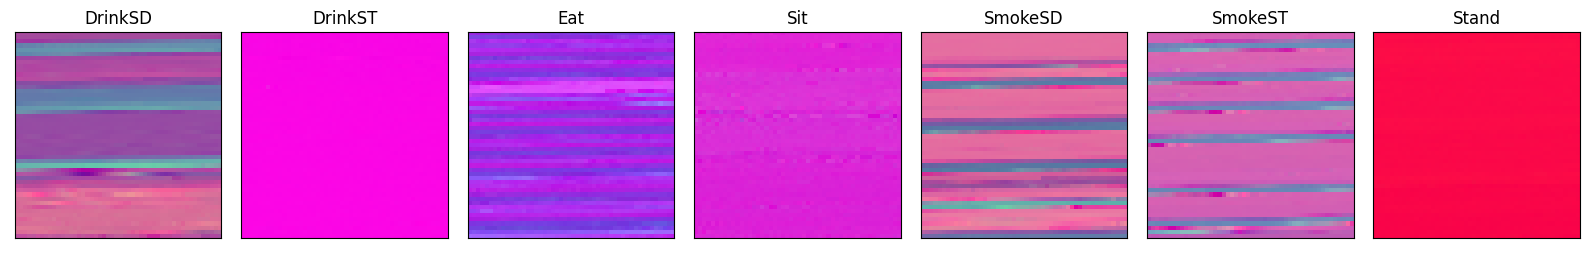

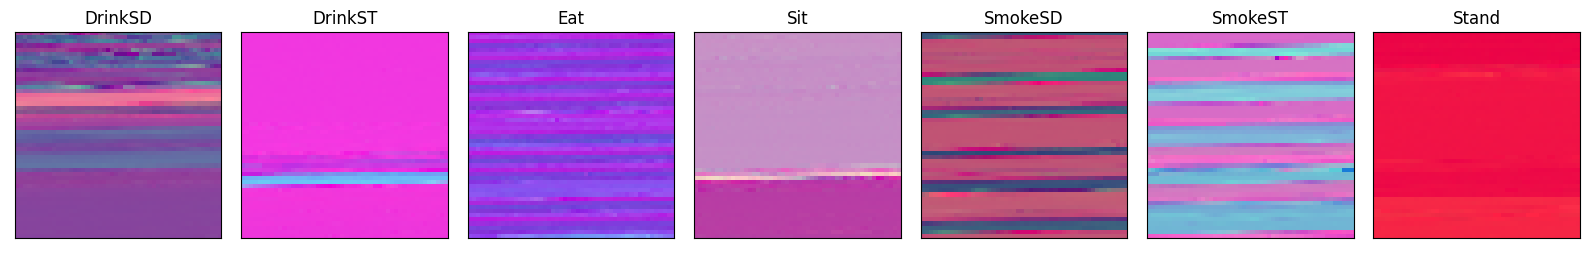

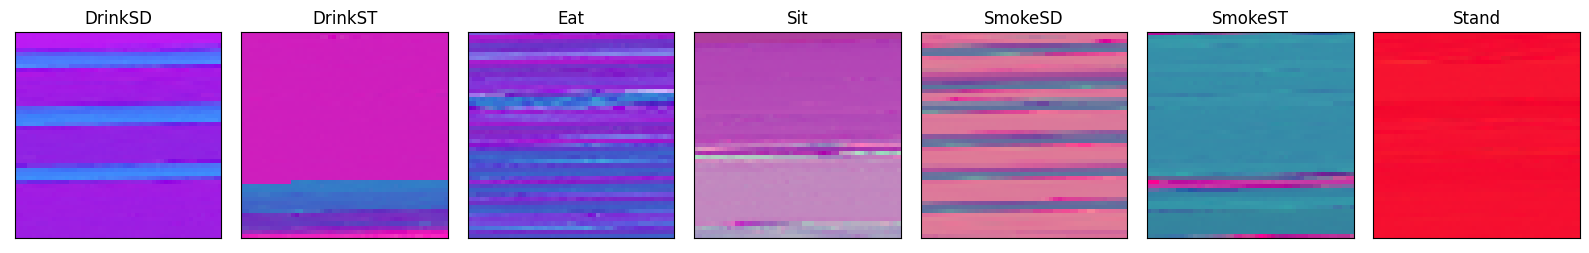

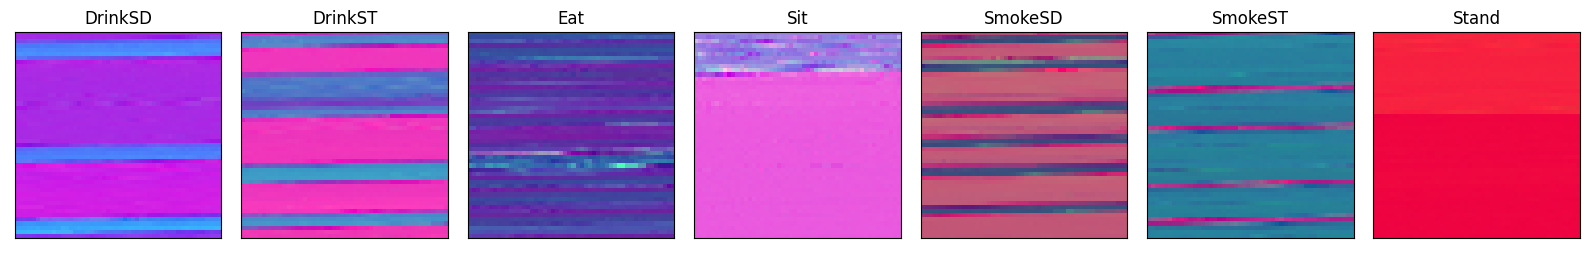

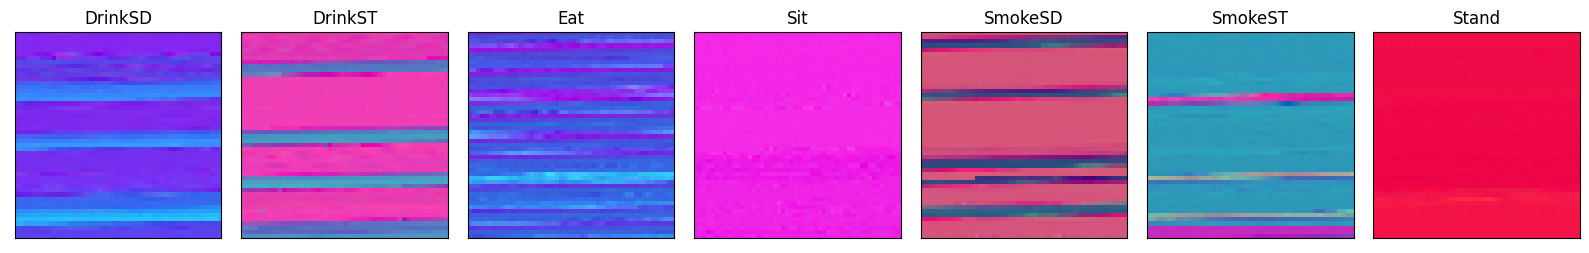

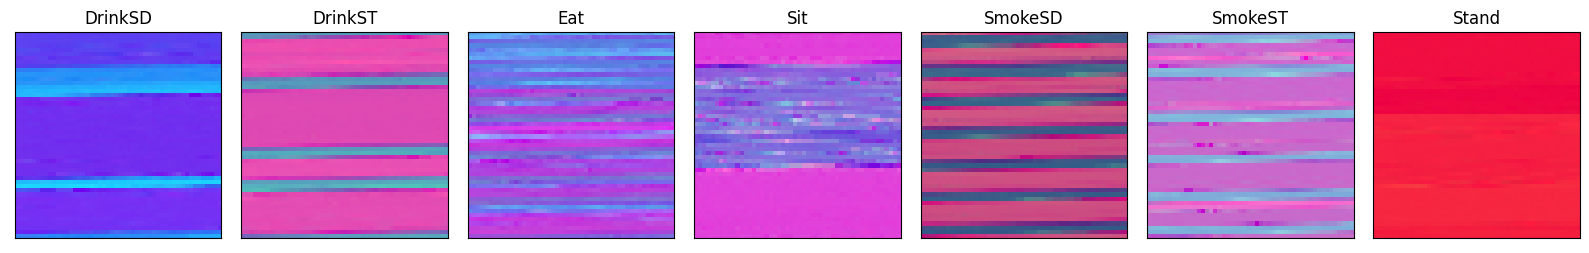

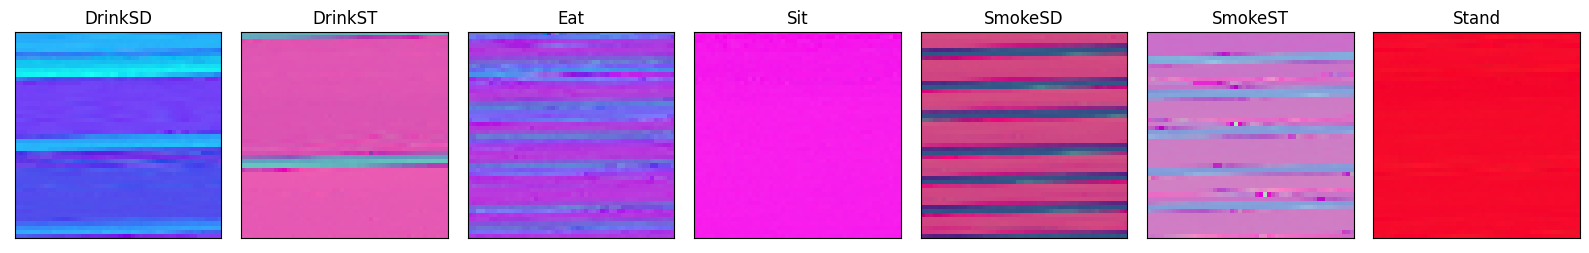

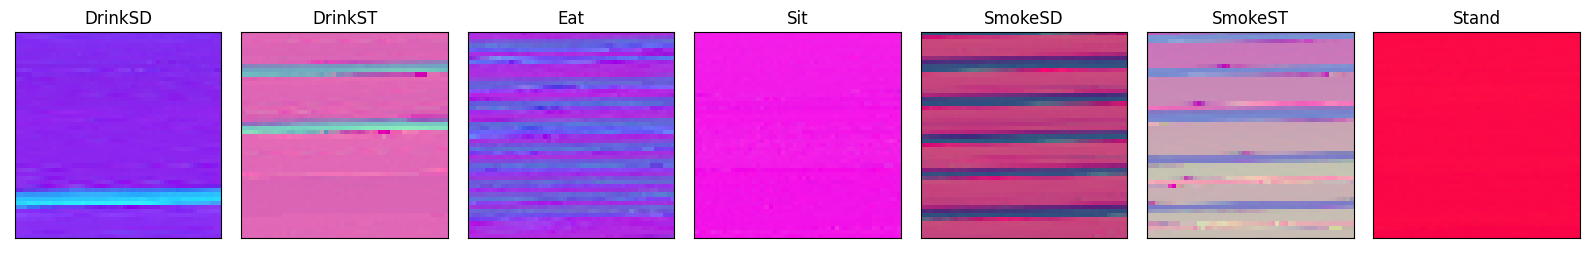

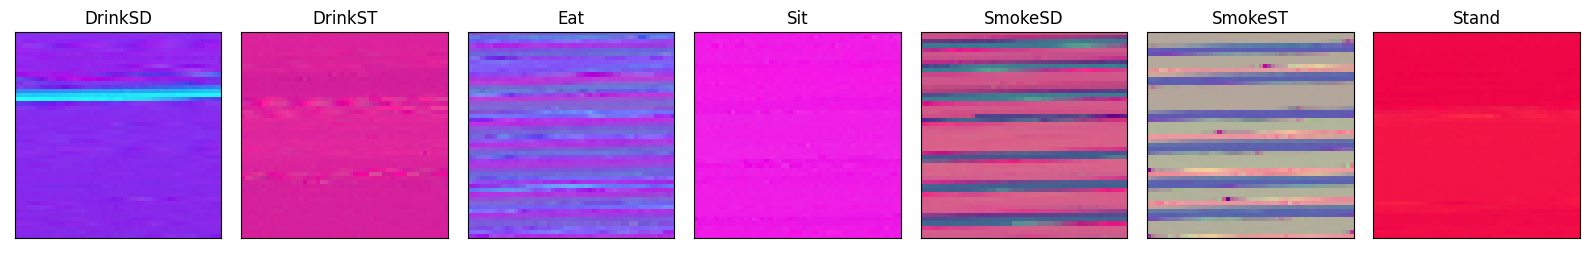

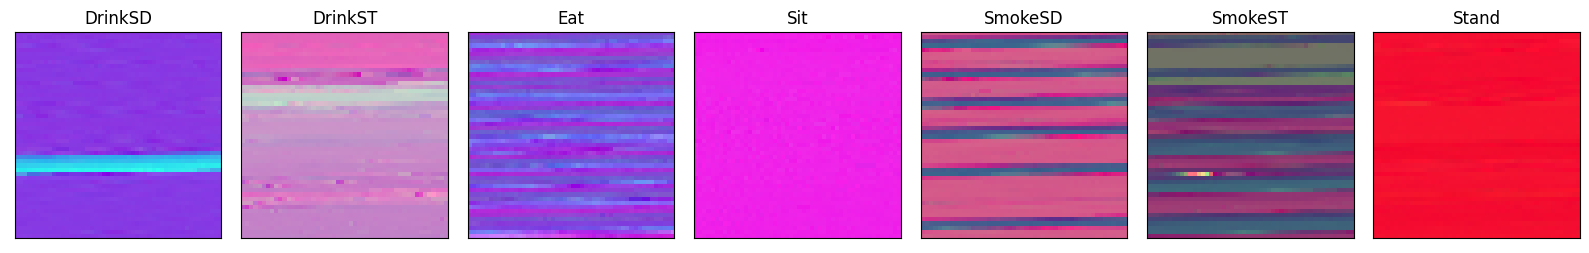

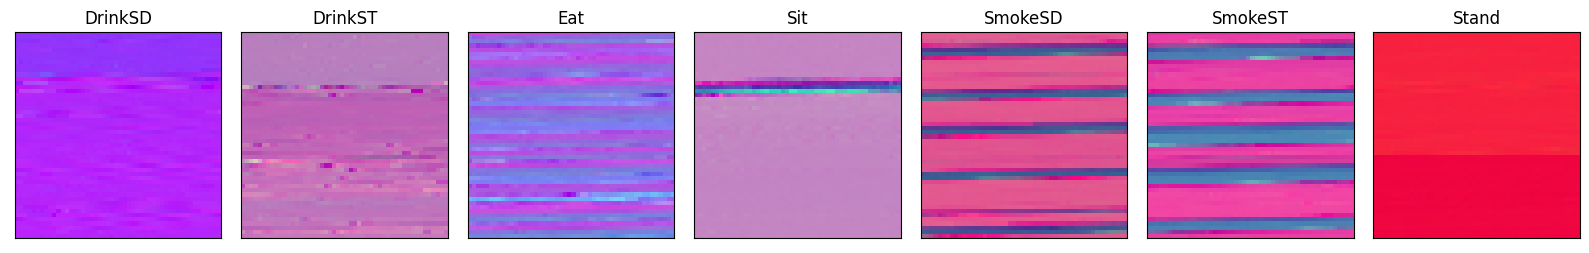

In [35]:
#keep made images in book...
if sensor == "accel" : 
    for n_row in range(1,20):
      n_act=0
      fig, axs = plt.subplots(1, n_act_types, figsize=(16, 9))
      for i in range(n_act_types):
        ax = axs[i]
        ax.set_title(f'{act_types[n_act]}', size=12)
        ax.set_xticks(()), ax.set_yticks(())
        ax.imshow(act_rgb[act_types[n_act]][n_row])
        n_act=n_act+1
      plt.tight_layout()

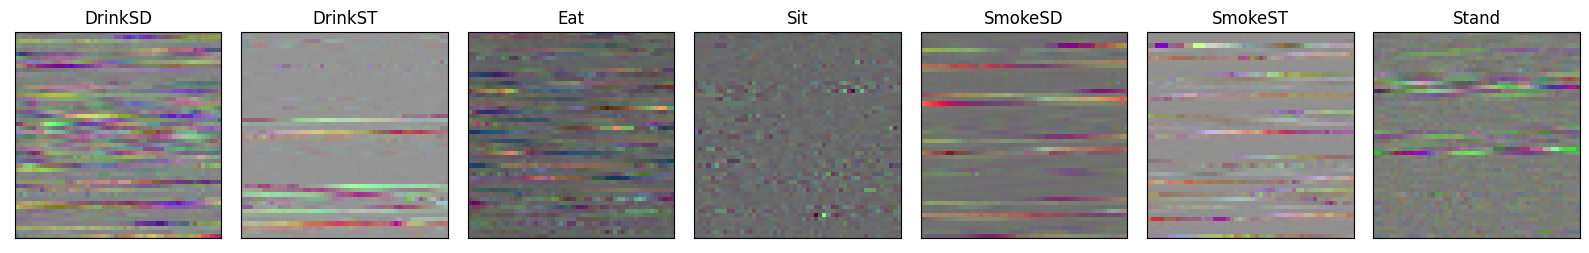

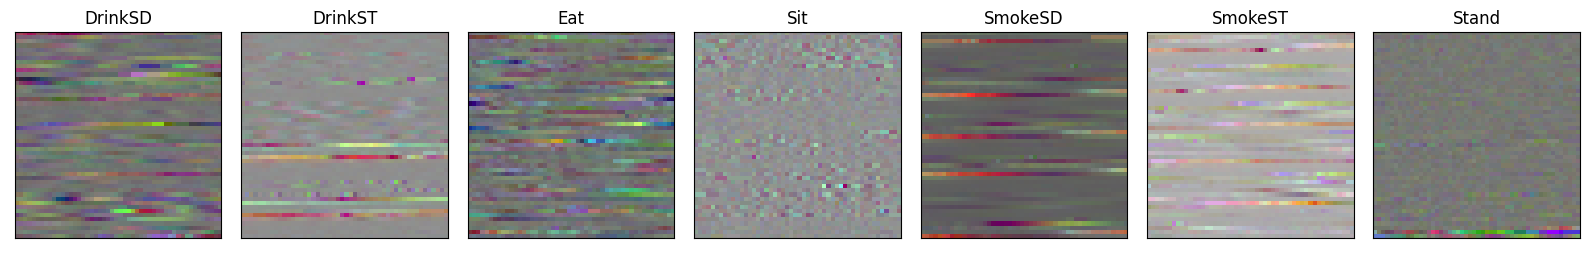

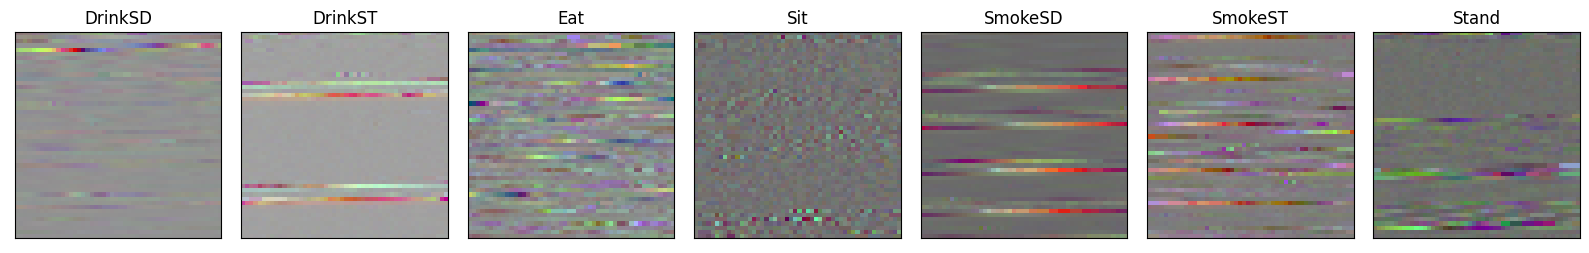

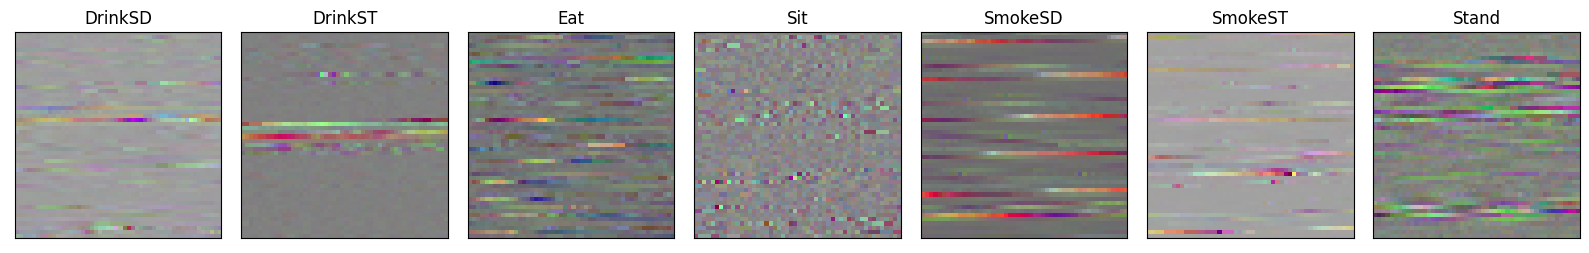

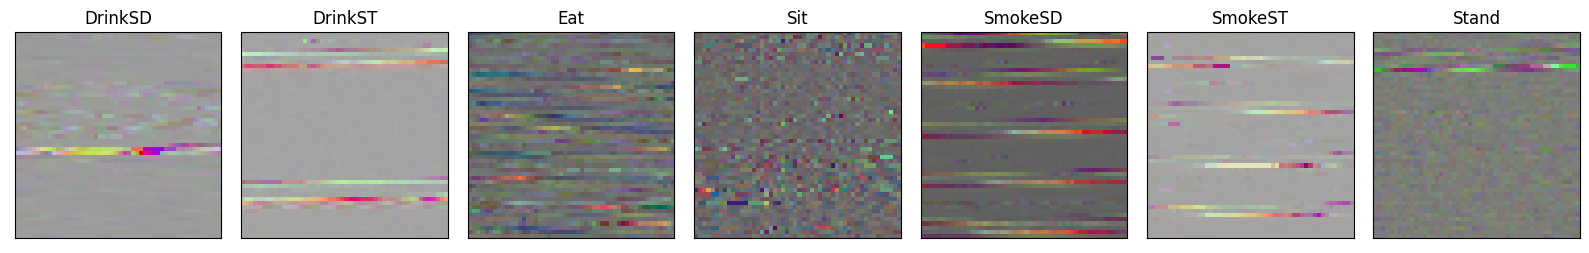

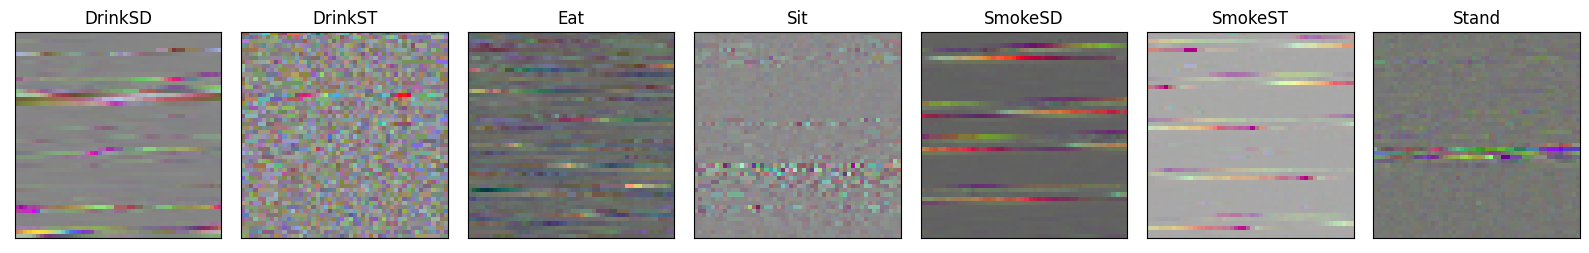

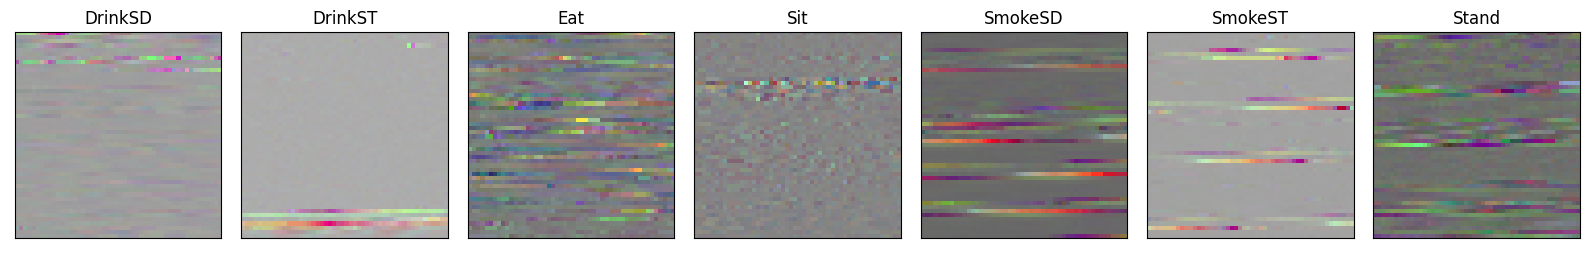

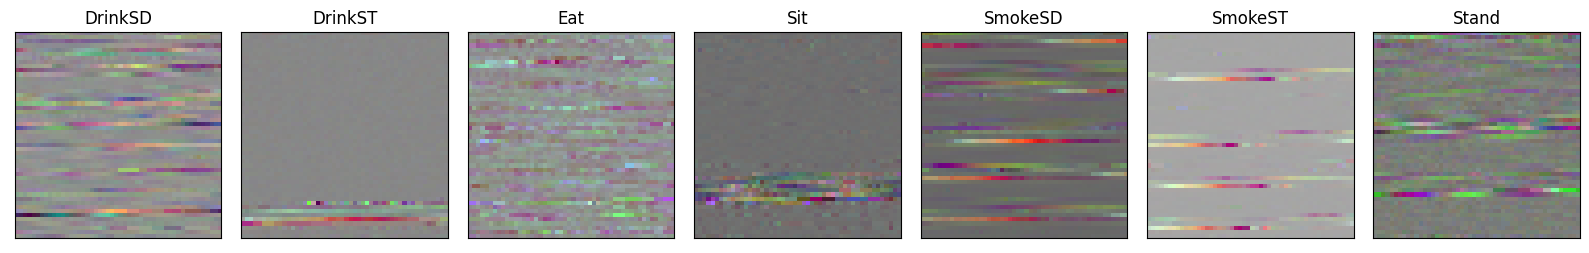

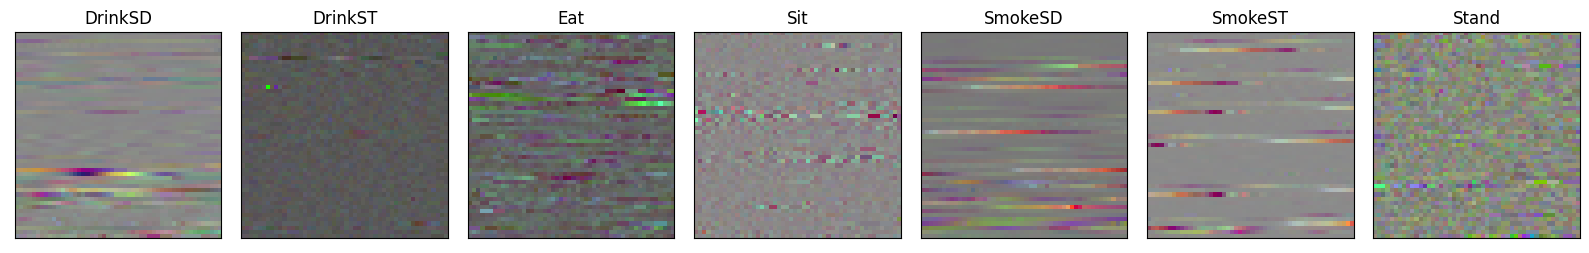

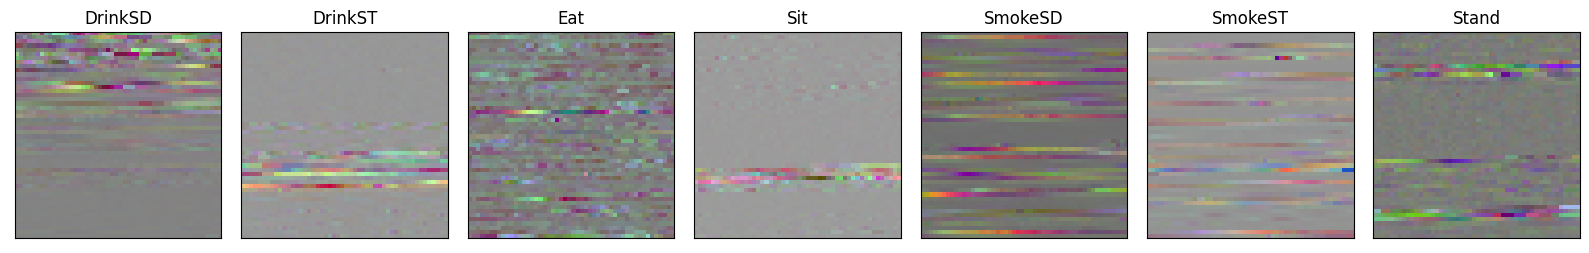

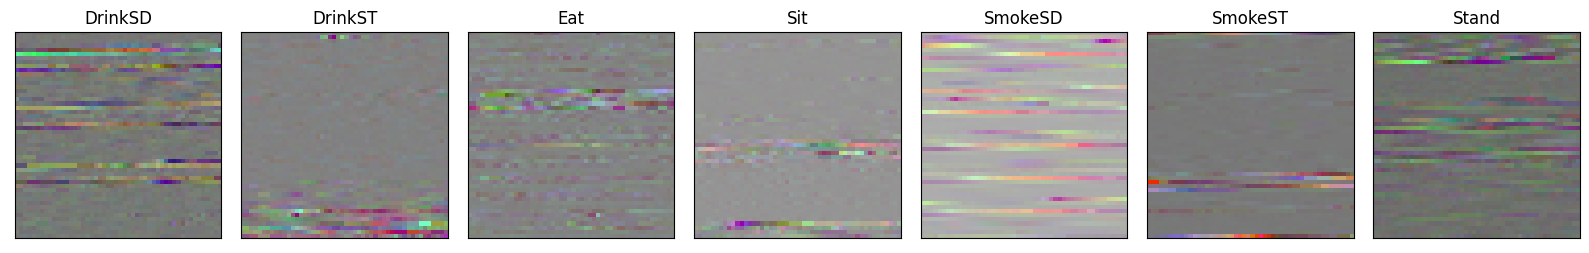

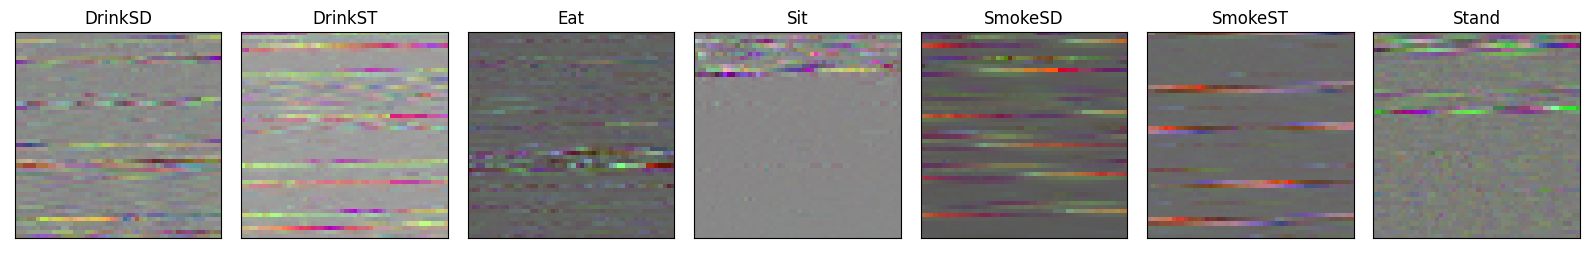

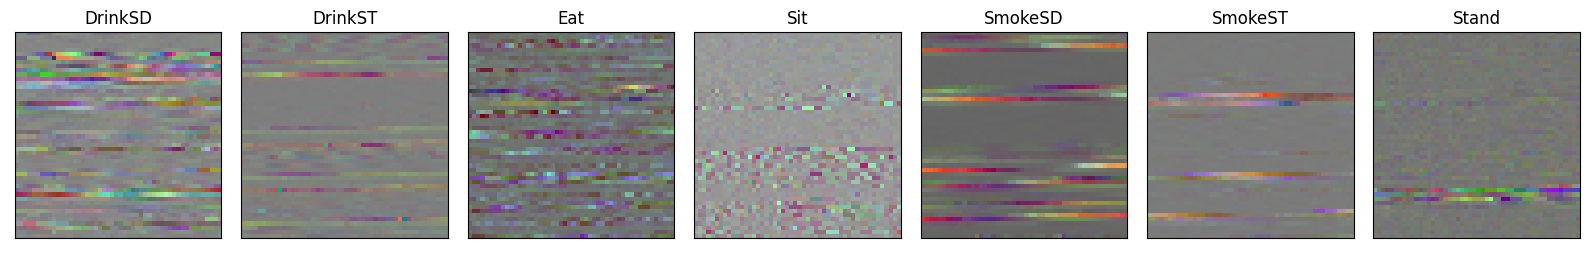

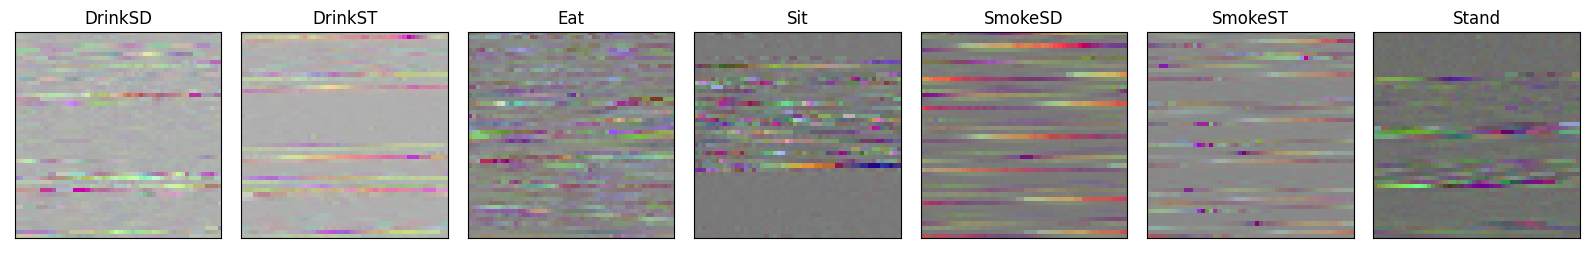

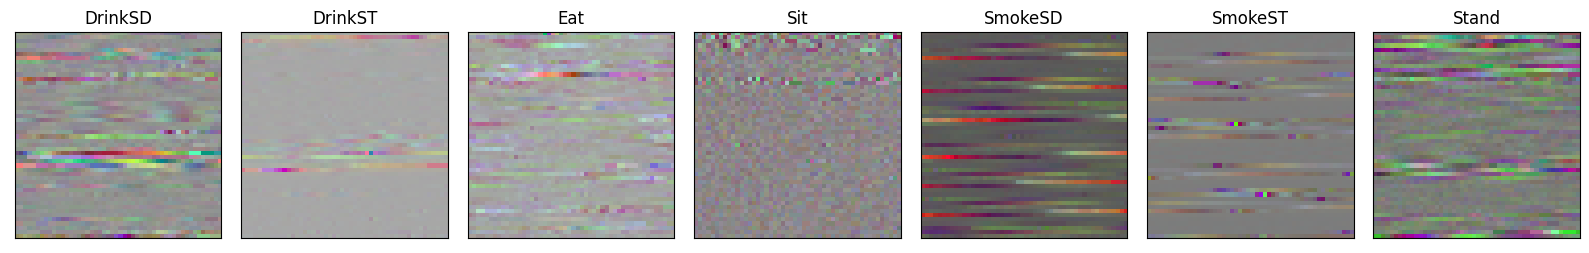

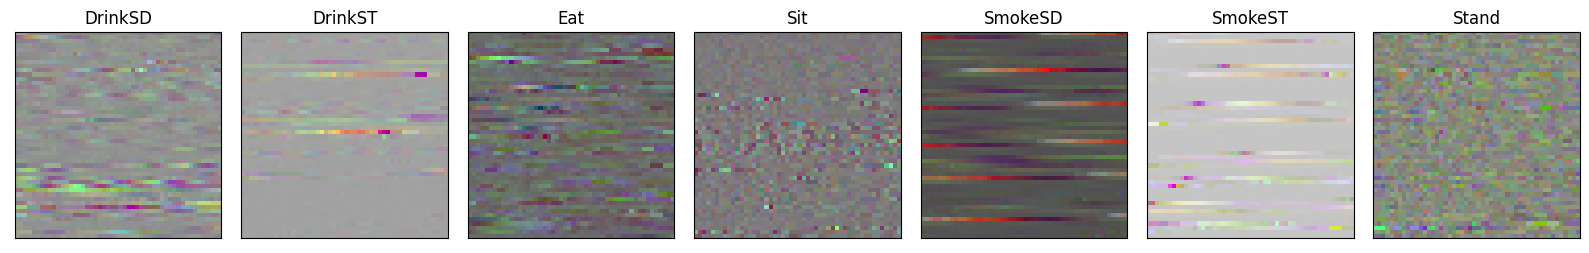

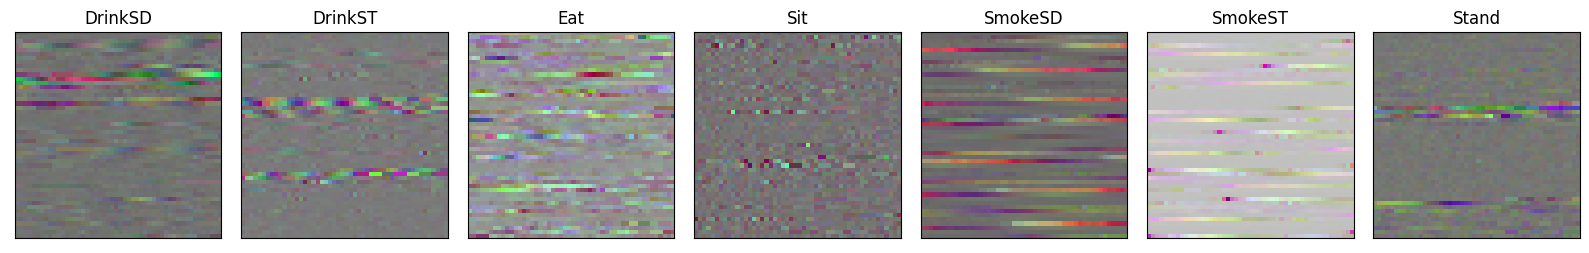

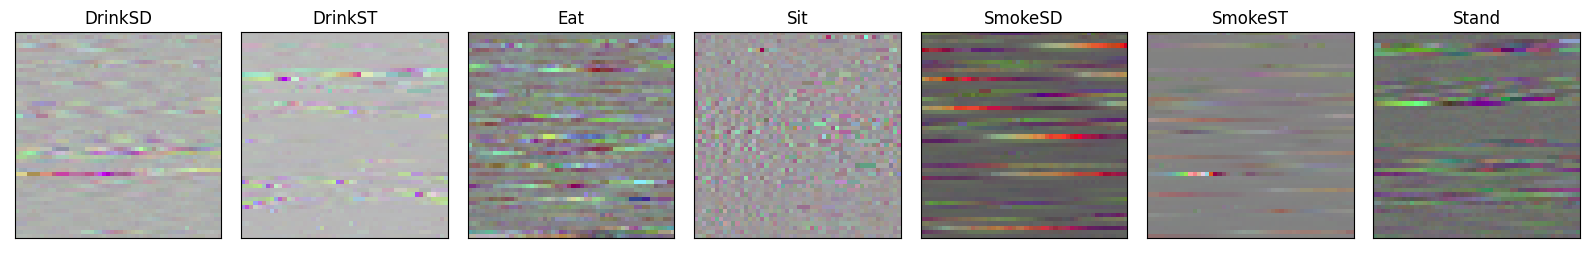

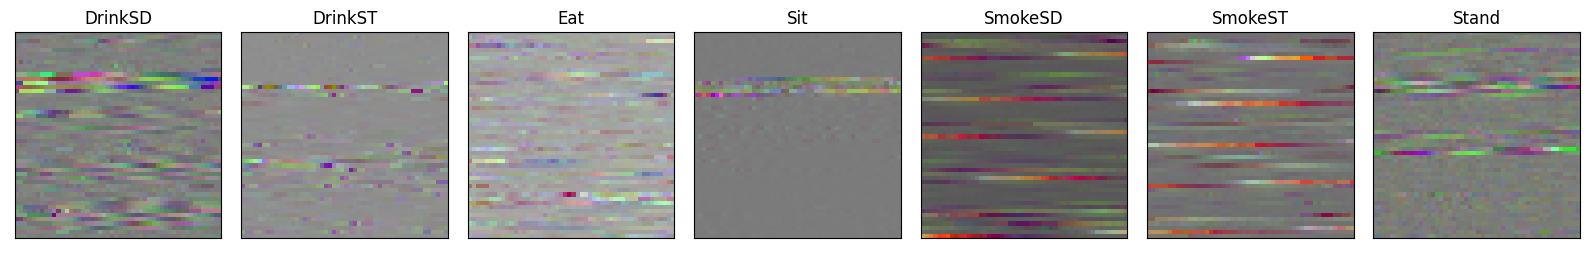

In [27]:
#keep images in book...
if sensor == "accel_lin" : 
    for n_row in range(1,20):
      n_act=0
      fig, axs = plt.subplots(1, n_act_types, figsize=(16, 9))
      for i in range(n_act_types):
        ax = axs[i]
        ax.set_title(f'{act_types[n_act]}', size=12)
        ax.set_xticks(()), ax.set_yticks(())
        ax.imshow(act_rgb[act_types[n_act]][n_row])
        n_act=n_act+1
      plt.tight_layout()

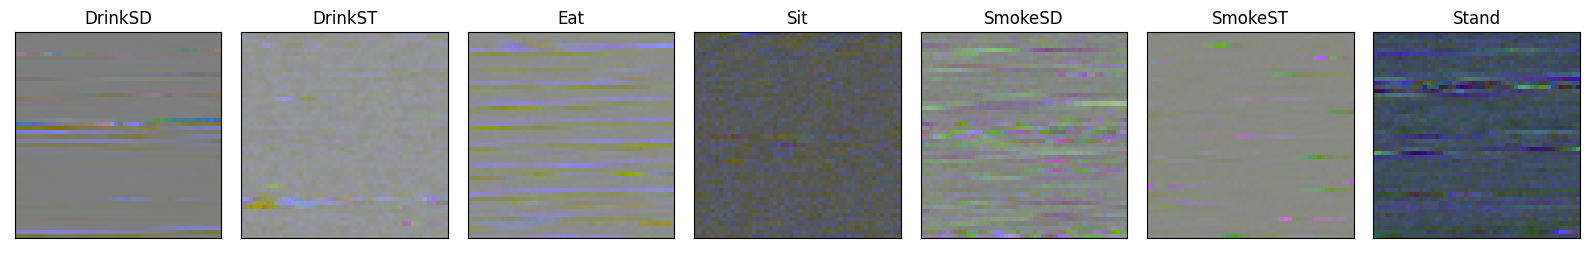

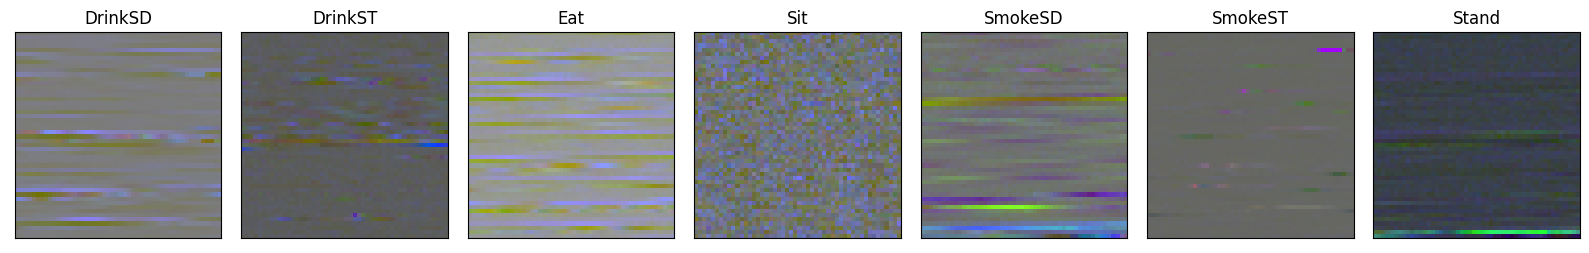

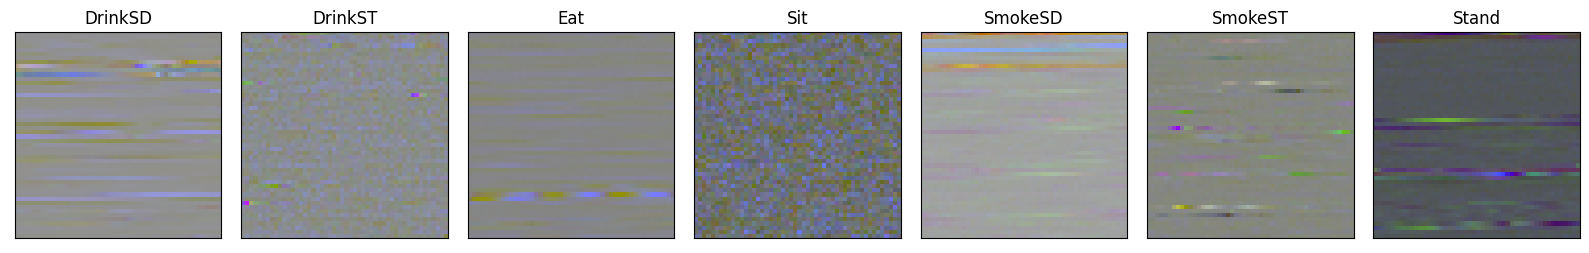

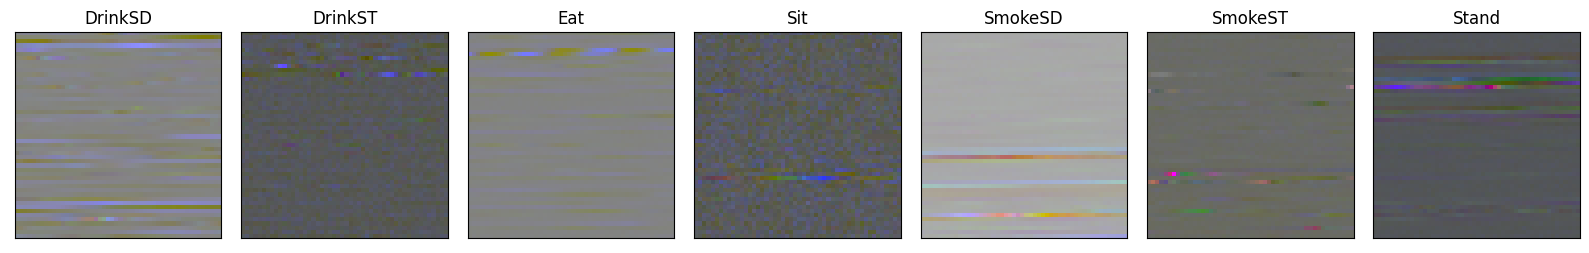

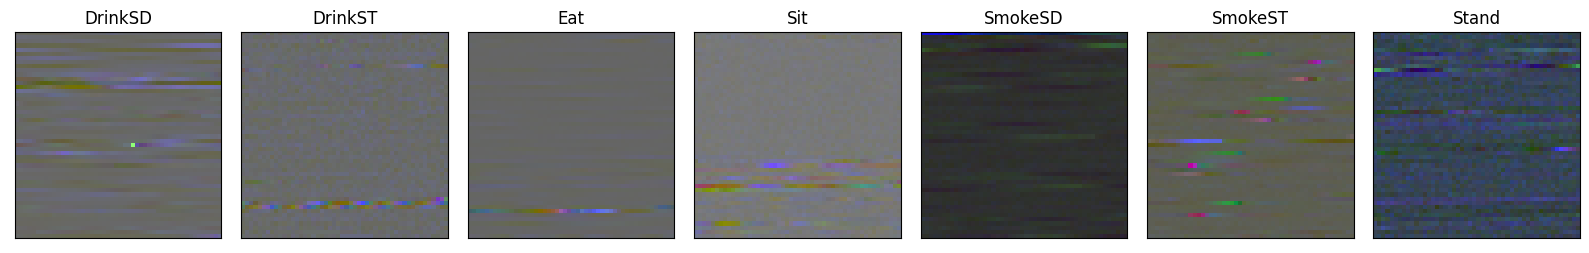

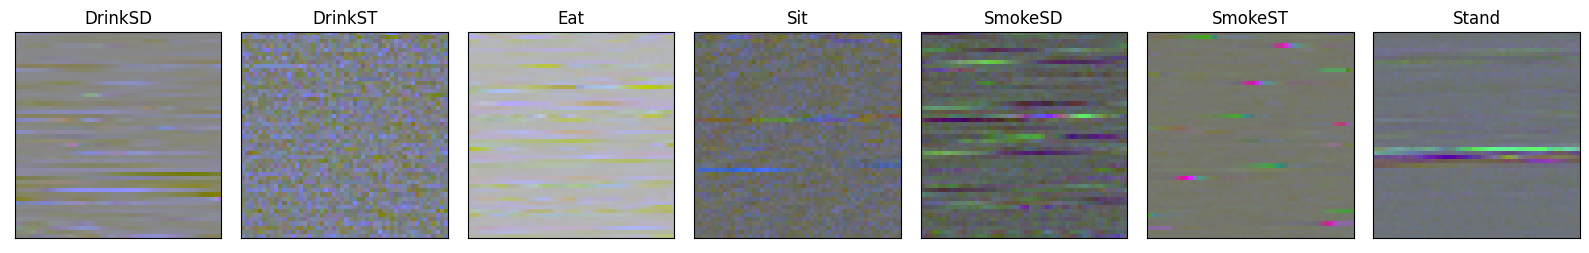

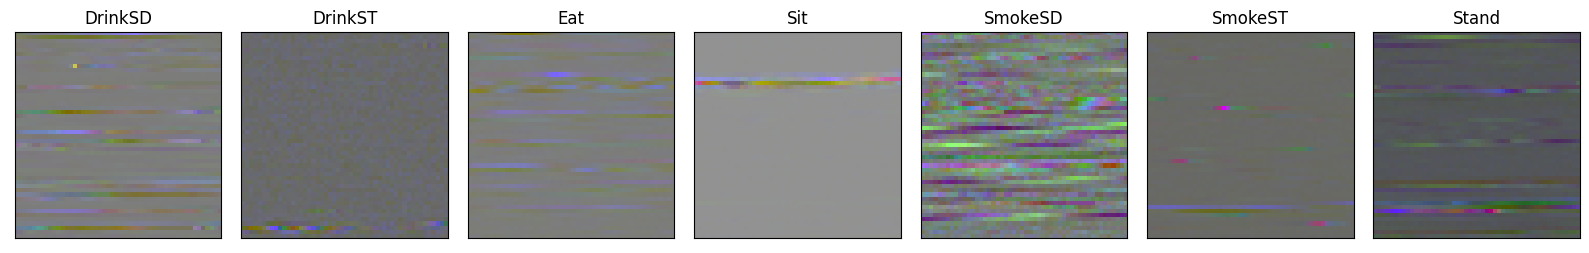

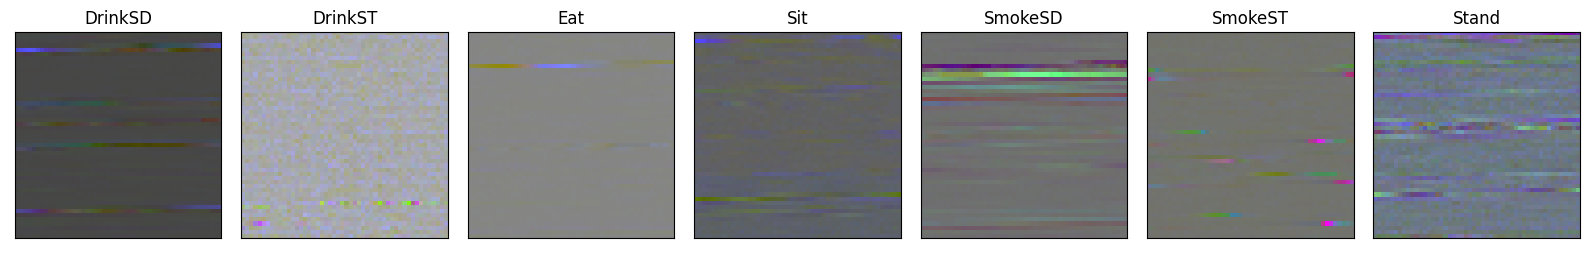

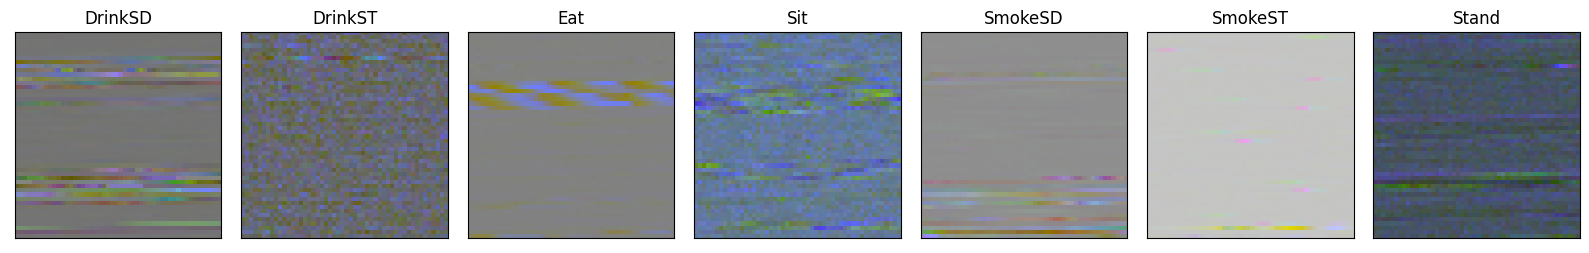

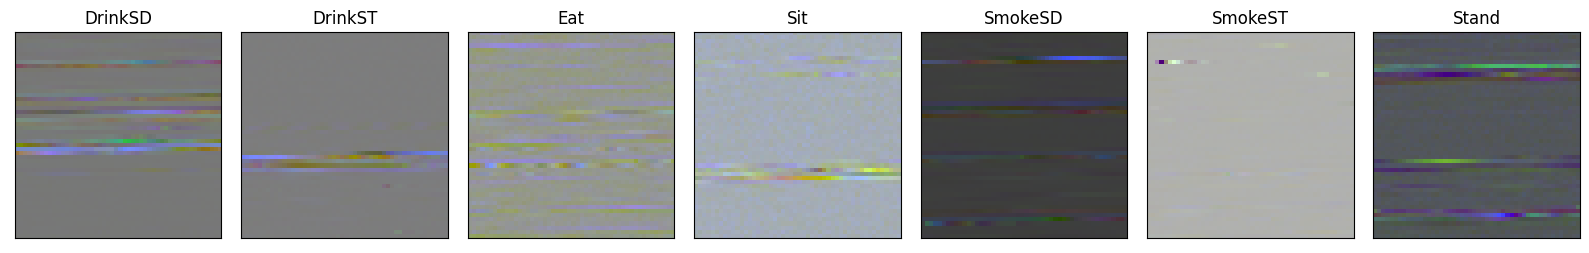

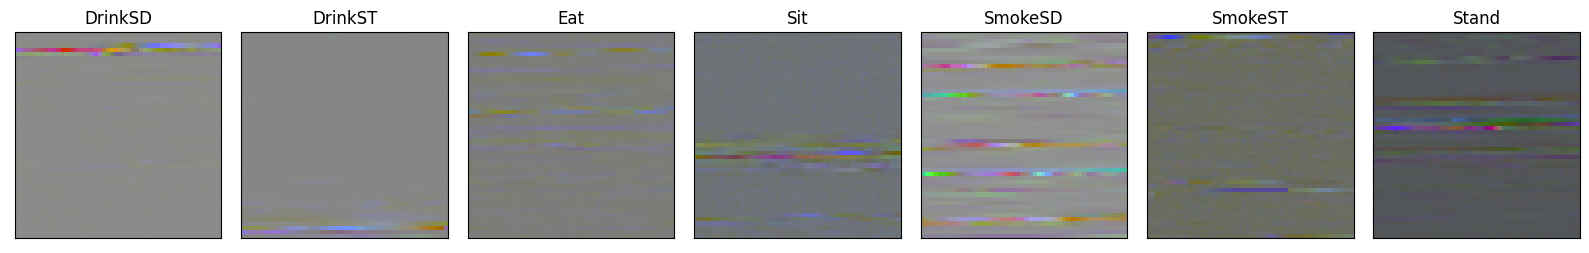

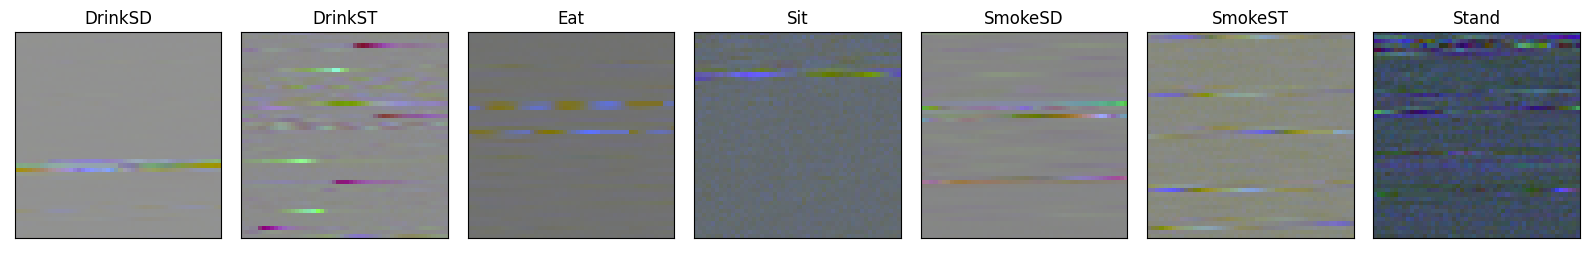

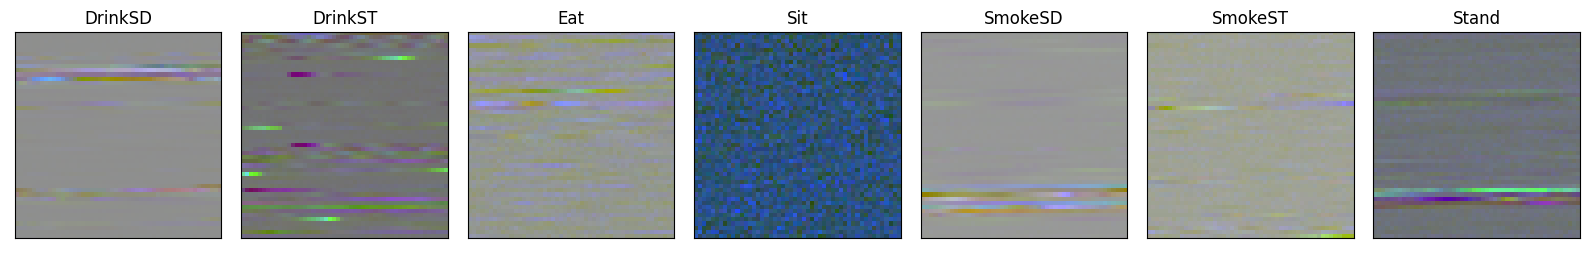

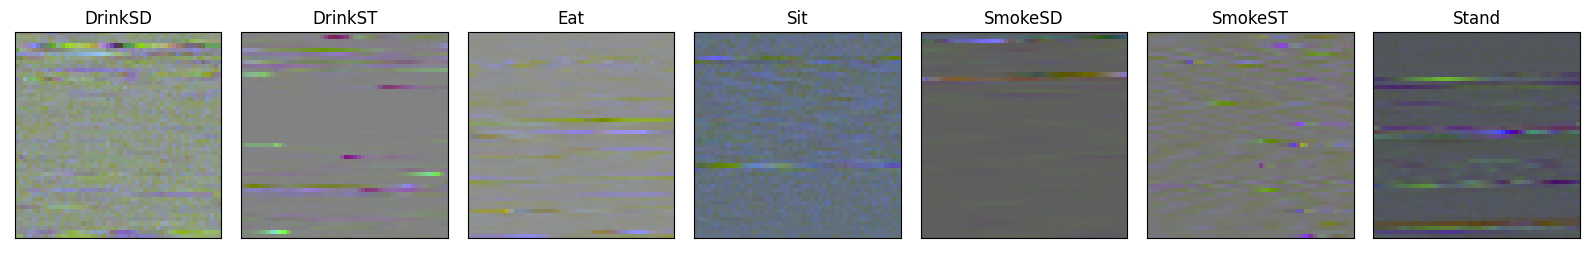

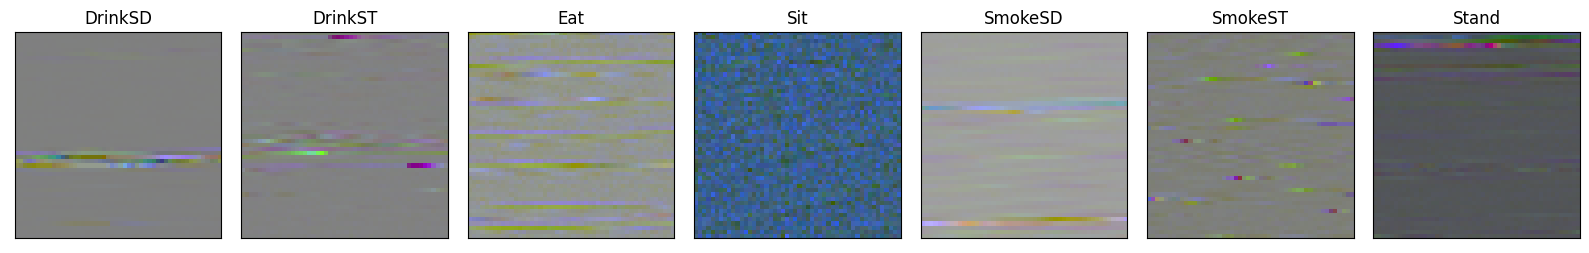

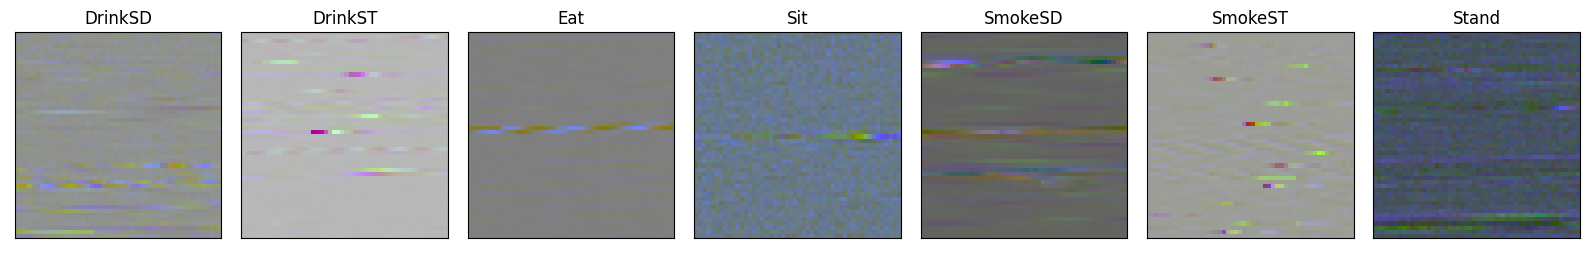

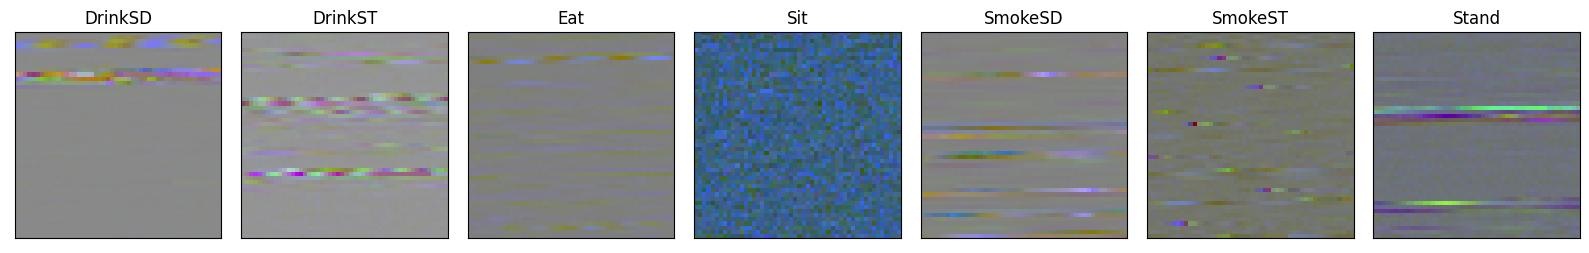

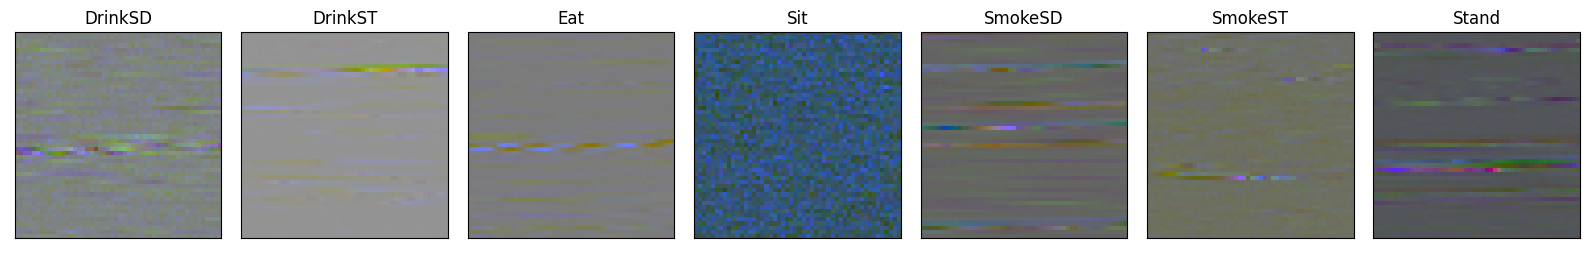

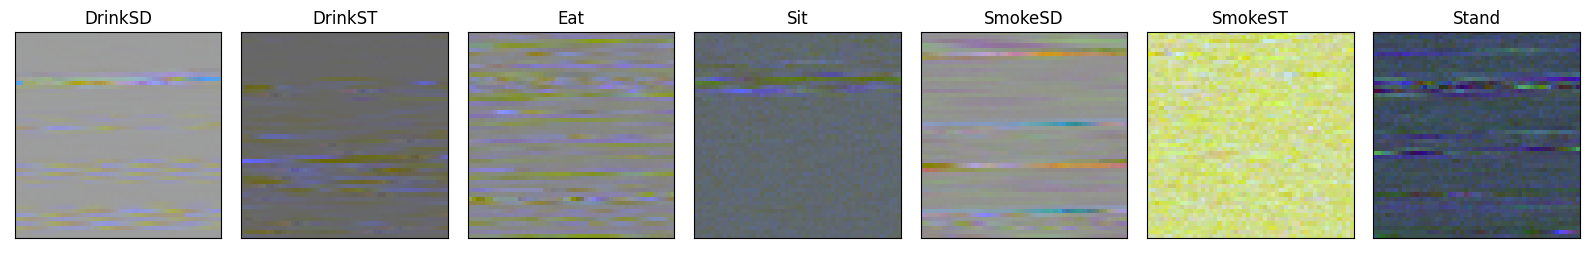

In [33]:
#keep images in book...
if sensor == "gyro" : 
    for n_row in range(1,20):
      n_act=0
      fig, axs = plt.subplots(1, n_act_types, figsize=(16, 9))
      for i in range(n_act_types):
        ax = axs[i]
        ax.set_title(f'{act_types[n_act]}', size=12)
        ax.set_xticks(()), ax.set_yticks(())
        ax.imshow(act_rgb[act_types[n_act]][n_row])
        n_act=n_act+1
      plt.tight_layout()

In [4]:
for f_in in os.listdir(pickles_dir): 
    if not (f_in.startswith('Participant') and f_in.endswith('_Data.pickle')) : continue
    print(f_in)

Participant10_Data.pickle
Participant2_Data.pickle
Participant5_Data.pickle
Participant8_Data.pickle
Participant6_Data.pickle
Participant1_Data.pickle
Participant9_Data.pickle
Participant3_Data.pickle
Participant4_Data.pickle
Participant7_Data.pickle
Participant11_Data.pickle


In [163]:
#ok, it's ime to make X, y from a whole dataset...

sampling=50  #sampling rate
win_len=50   #wind size in secs

overlap=False #overlap will add 2 pass adding windsows shifted 1/2 window... 
overlap_str="_with_overlap" if overlap else ""

feature_set="accel" # "accel" or "accel+gyro"

ignore_dudes = [ "Participant10" ]

sensors=['Accelerometer_x_WD', 
         'Accelerometer_y_WD', 
         'Accelerometer_z_WD'] 

sensors_weights={ "Accelerometer_x_WD": 5.0, 
                  "Accelerometer_y_WD": 5.0, 
                  "Accelerometer_z_WD": 1.0 }
    
# our rgb-likes & sensor weights
if feature_set == "accel+gyro" :  
  sensors.extend(['Gyroscope_x_PD', 
                  'Gyroscope_y_PD', 
                  'Gyroscope_z_PD'])
  sensors_weights.update({ "Gyroscope_x_PD": 1.0, 
                           "Gyroscope_y_PD": 1.0, 
                           "Gyroscope_z_PD": 1.0 })
    
tot_frame_len=sampling*win_len
n_sensors=len(sensors)

#prefer to hardcode expected act_types here...
act_types=[ 'DrinkSD', 'DrinkST', 'Eat', 'Sit', 'SmokeSD', 'SmokeST', 'Stand' ]
n_act_types=len(act_types)

id_str=str(len(sensors)) + "sensors_win" + str(win_len) + overlap_str

In [164]:
X_act_data={} #final dict (par participant) with dicts {acivity:[list of frames of res_y duration]}
 
n_participant=0
for f_in in os.listdir(pickles_dir): 
    
    # load raw from pickle
    
    if not (f_in.startswith('Participant') and f_in.endswith('_Data.pickle')) : continue
     
    skip_this_one=False
    for dude in ignore_dudes :
        if f_in.startswith(dude):
            print ("skipping {}".format(dude))
            skip_this_one=True
            break    
    
    if skip_this_one: continue        
        
    print("prcessing {}".format(f_in))

    data = pd.read_pickle(os.path.join(pickles_dir, f_in)) 
       
    act_types_in_file=np.sort(data[categ_colname].unique())
    
    if len(act_types_in_file) != n_act_types :
        
       if n_act_types > len(act_types_in_file) :         
         diff_acts=list(set(act_types) - set(act_types_in_file))
       else:
         diff_acts=list(set(act_types_in_file) - set(act_types)) 
       
       print("achtung, file {} has new or missing activities...".format(f_in, ", ".join(diff_acts))) 
   
    # make windows sets from raw...
    
    X_act_participant={} #will be appended to X_act_data after the loop is done...
    
    max_count = int(len(data)/tot_frame_len)
    if overlap : max_count+=max_count
        
    print("expecting approx {} images in total...".format(max_count))
    
    pbar = IntProgress(min=0, max=max_count) 
    display(pbar) 
        
    for act_type in act_types :
      data_cursor = data[(data[categ_colname] == act_type)]   
      data_act_type_len=len(data_cursor)-tot_frame_len
      X_act_participant[act_type]=[]
    
      if data_act_type_len < tot_frame_len : 
        print("start skipping {} cur not enugh for at least 1 frame...".format(act_type))
        continue
        
      max_count_act = int(len(data_cursor)/tot_frame_len)
      if overlap : max_count_act += max_count_act
      print("expecting approx {} {} windows in total...".format(act_type, max_count_act))     
    
      nth_frame=0   
      overlap_shift=0
     
      _overlap=overlap
    
      while True:  
        cur_pos=nth_frame*tot_frame_len
        if cur_pos > data_act_type_len :  
          if not _overlap : break  
            
          #on overlap make 2nd pass shiting init cursor pos (i.e. beg of dataframe) 1/2 window len
          cur_pos       = 0
          nth_frame     = 0
          overlap_shift = int(win_len/2)
          _overlap       = False
          print("overlap pass...")
            
        #====== start sliding window... 
        
        beg_row=nth_frame*tot_frame_len+overlap_shift
        end_row=beg_row+tot_frame_len
        
        data_tmp=data_cursor[beg_row:end_row] 

        #fill frame from data_tmp...
        raw_data = []                          
        for nth_sec in range(0, win_len):
          for nrow in range(0, sampling):
             try:
               row=data_tmp.iloc[win_len*nth_sec+nrow] 
             except:
               print(win_len*nth_sec + nrow)
               raise("error")
                
             for fld in sensors:
                raw_data.append(row[fld] * sensors_weights[fld])

        X_act_participant[act_type].append(np.array(raw_data))
        nth_frame+=1

        pbar.value += 1   
        if pbar.value % 20 == 0:
           print("{} dataframes of {}".format(20, act_type))

      print("processed {} frames of {}".format(nth_frame, act_type))
    
    X_act_data[n_participant]=X_act_participant  
    print("done with participant {}\n".format(n_participant))
    n_participant=n_participant+1

skipping Participant10
prcessing Participant2_Data.pickle
expecting approx 395 images in total...


IntProgress(value=0, max=395)

expecting approx DrinkSD 56 windows in total...
20 dataframes of DrinkSD
20 dataframes of DrinkSD
processed 56 frames of DrinkSD
expecting approx DrinkST 56 windows in total...
20 dataframes of DrinkST
20 dataframes of DrinkST
20 dataframes of DrinkST
processed 56 frames of DrinkST
expecting approx Eat 56 windows in total...
20 dataframes of Eat
20 dataframes of Eat
20 dataframes of Eat
processed 56 frames of Eat
expecting approx Sit 56 windows in total...
20 dataframes of Sit
20 dataframes of Sit
20 dataframes of Sit
processed 56 frames of Sit
expecting approx SmokeSD 56 windows in total...
20 dataframes of SmokeSD
20 dataframes of SmokeSD
20 dataframes of SmokeSD
processed 56 frames of SmokeSD
expecting approx SmokeST 56 windows in total...
20 dataframes of SmokeST
20 dataframes of SmokeST
processed 56 frames of SmokeST
expecting approx Stand 56 windows in total...
20 dataframes of Stand
20 dataframes of Stand
20 dataframes of Stand
processed 56 frames of Stand
done with participant 

IntProgress(value=0, max=156)

expecting approx DrinkSD 22 windows in total...
20 dataframes of DrinkSD
processed 22 frames of DrinkSD
expecting approx DrinkST 22 windows in total...
20 dataframes of DrinkST
processed 22 frames of DrinkST
expecting approx Eat 22 windows in total...
20 dataframes of Eat
processed 22 frames of Eat
expecting approx Sit 22 windows in total...
20 dataframes of Sit
processed 22 frames of Sit
expecting approx SmokeSD 22 windows in total...
20 dataframes of SmokeSD
processed 22 frames of SmokeSD
expecting approx SmokeST 22 windows in total...
20 dataframes of SmokeST
processed 22 frames of SmokeST
expecting approx Stand 22 windows in total...
20 dataframes of Stand
processed 22 frames of Stand
done with participant 1

prcessing Participant8_Data.pickle
expecting approx 170 images in total...


IntProgress(value=0, max=170)

expecting approx DrinkSD 24 windows in total...
20 dataframes of DrinkSD
processed 24 frames of DrinkSD
expecting approx DrinkST 24 windows in total...
20 dataframes of DrinkST
processed 24 frames of DrinkST
expecting approx Eat 24 windows in total...
20 dataframes of Eat
processed 24 frames of Eat
expecting approx Sit 24 windows in total...
20 dataframes of Sit
processed 24 frames of Sit
expecting approx SmokeSD 24 windows in total...
20 dataframes of SmokeSD
20 dataframes of SmokeSD
processed 24 frames of SmokeSD
expecting approx SmokeST 24 windows in total...
20 dataframes of SmokeST
processed 24 frames of SmokeST
expecting approx Stand 24 windows in total...
20 dataframes of Stand
processed 24 frames of Stand
done with participant 2

prcessing Participant6_Data.pickle
expecting approx 166 images in total...


IntProgress(value=0, max=166)

expecting approx DrinkSD 23 windows in total...
20 dataframes of DrinkSD
processed 23 frames of DrinkSD
expecting approx DrinkST 23 windows in total...
20 dataframes of DrinkST
processed 23 frames of DrinkST
expecting approx Eat 23 windows in total...
20 dataframes of Eat
processed 23 frames of Eat
expecting approx Sit 23 windows in total...
20 dataframes of Sit
processed 23 frames of Sit
expecting approx SmokeSD 23 windows in total...
20 dataframes of SmokeSD
processed 23 frames of SmokeSD
expecting approx SmokeST 23 windows in total...
20 dataframes of SmokeST
processed 23 frames of SmokeST
expecting approx Stand 23 windows in total...
20 dataframes of Stand
20 dataframes of Stand
processed 23 frames of Stand
done with participant 3

prcessing Participant1_Data.pickle
expecting approx 361 images in total...


IntProgress(value=0, max=361)

expecting approx DrinkSD 51 windows in total...
20 dataframes of DrinkSD
20 dataframes of DrinkSD
processed 51 frames of DrinkSD
expecting approx DrinkST 51 windows in total...
20 dataframes of DrinkST
20 dataframes of DrinkST
20 dataframes of DrinkST
processed 51 frames of DrinkST
expecting approx Eat 51 windows in total...
20 dataframes of Eat
20 dataframes of Eat
processed 51 frames of Eat
expecting approx Sit 51 windows in total...
20 dataframes of Sit
20 dataframes of Sit
20 dataframes of Sit
processed 51 frames of Sit
expecting approx SmokeSD 51 windows in total...
20 dataframes of SmokeSD
20 dataframes of SmokeSD
processed 51 frames of SmokeSD
expecting approx SmokeST 51 windows in total...
20 dataframes of SmokeST
20 dataframes of SmokeST
20 dataframes of SmokeST
processed 51 frames of SmokeST
expecting approx Stand 51 windows in total...
20 dataframes of Stand
20 dataframes of Stand
processed 51 frames of Stand
done with participant 4

prcessing Participant9_Data.pickle
expect

IntProgress(value=0, max=204)

expecting approx DrinkSD 29 windows in total...
20 dataframes of DrinkSD
processed 29 frames of DrinkSD
expecting approx DrinkST 29 windows in total...
20 dataframes of DrinkST
processed 29 frames of DrinkST
expecting approx Eat 29 windows in total...
20 dataframes of Eat
20 dataframes of Eat
processed 29 frames of Eat
expecting approx Sit 29 windows in total...
20 dataframes of Sit
processed 29 frames of Sit
expecting approx SmokeSD 29 windows in total...
20 dataframes of SmokeSD
20 dataframes of SmokeSD
processed 29 frames of SmokeSD
expecting approx SmokeST 29 windows in total...
20 dataframes of SmokeST
processed 29 frames of SmokeST
expecting approx Stand 29 windows in total...
20 dataframes of Stand
20 dataframes of Stand
processed 29 frames of Stand
done with participant 5

prcessing Participant3_Data.pickle
expecting approx 406 images in total...


IntProgress(value=0, max=406)

expecting approx DrinkSD 58 windows in total...
20 dataframes of DrinkSD
20 dataframes of DrinkSD
processed 58 frames of DrinkSD
expecting approx DrinkST 58 windows in total...
20 dataframes of DrinkST
20 dataframes of DrinkST
20 dataframes of DrinkST
processed 58 frames of DrinkST
expecting approx Eat 58 windows in total...
20 dataframes of Eat
20 dataframes of Eat
20 dataframes of Eat
processed 58 frames of Eat
expecting approx Sit 58 windows in total...
20 dataframes of Sit
20 dataframes of Sit
20 dataframes of Sit
processed 58 frames of Sit
expecting approx SmokeSD 58 windows in total...
20 dataframes of SmokeSD
20 dataframes of SmokeSD
20 dataframes of SmokeSD
processed 58 frames of SmokeSD
expecting approx SmokeST 58 windows in total...
20 dataframes of SmokeST
20 dataframes of SmokeST
20 dataframes of SmokeST
processed 58 frames of SmokeST
expecting approx Stand 58 windows in total...
20 dataframes of Stand
20 dataframes of Stand
20 dataframes of Stand
processed 58 frames of Sta

IntProgress(value=0, max=311)

expecting approx DrinkSD 44 windows in total...
20 dataframes of DrinkSD
20 dataframes of DrinkSD
processed 44 frames of DrinkSD
expecting approx DrinkST 44 windows in total...
20 dataframes of DrinkST
20 dataframes of DrinkST
processed 44 frames of DrinkST
expecting approx Eat 44 windows in total...
20 dataframes of Eat
20 dataframes of Eat
processed 44 frames of Eat
expecting approx Sit 44 windows in total...
20 dataframes of Sit
20 dataframes of Sit
processed 44 frames of Sit
expecting approx SmokeSD 44 windows in total...
20 dataframes of SmokeSD
20 dataframes of SmokeSD
20 dataframes of SmokeSD
processed 44 frames of SmokeSD
expecting approx SmokeST 44 windows in total...
20 dataframes of SmokeST
20 dataframes of SmokeST
processed 44 frames of SmokeST
expecting approx Stand 44 windows in total...
20 dataframes of Stand
20 dataframes of Stand
processed 44 frames of Stand
done with participant 7

prcessing Participant7_Data.pickle
expecting approx 140 images in total...


IntProgress(value=0, max=140)

expecting approx DrinkSD 20 windows in total...
20 dataframes of DrinkSD
processed 20 frames of DrinkSD
expecting approx DrinkST 20 windows in total...
20 dataframes of DrinkST
processed 20 frames of DrinkST
expecting approx Eat 20 windows in total...
20 dataframes of Eat
processed 20 frames of Eat
expecting approx Sit 20 windows in total...
20 dataframes of Sit
processed 20 frames of Sit
expecting approx SmokeSD 20 windows in total...
20 dataframes of SmokeSD
processed 20 frames of SmokeSD
expecting approx SmokeST 20 windows in total...
20 dataframes of SmokeST
processed 20 frames of SmokeST
expecting approx Stand 20 windows in total...
20 dataframes of Stand
processed 20 frames of Stand
done with participant 8

prcessing Participant11_Data.pickle
expecting approx 156 images in total...


IntProgress(value=0, max=156)

expecting approx DrinkSD 22 windows in total...
20 dataframes of DrinkSD
processed 22 frames of DrinkSD
expecting approx DrinkST 22 windows in total...
20 dataframes of DrinkST
processed 22 frames of DrinkST
expecting approx Eat 22 windows in total...
20 dataframes of Eat
processed 22 frames of Eat
expecting approx Sit 22 windows in total...
20 dataframes of Sit
processed 22 frames of Sit
expecting approx SmokeSD 22 windows in total...
20 dataframes of SmokeSD
processed 22 frames of SmokeSD
expecting approx SmokeST 22 windows in total...
20 dataframes of SmokeST
processed 22 frames of SmokeST
expecting approx Stand 22 windows in total...
20 dataframes of Stand
processed 22 frames of Stand
done with participant 9



In [166]:
print("n parts: {}, n categs: {}".format(len(X_act_data), len(X_act_data[0])))

n parts: 10, n categs: 7


In [167]:
save_2picke = True 
load_from_pickle=False

x_obj_fname=x_dir + "/" + "x_" + id_str + "_secs.dump"

if save_2picke : 
  x_to_save={"sampling" : sampling, "window"          : win_len,  
             "overlap"  : overlap,
             "sensors"  : sensors,  "sensors_weights" : sensors_weights, 
             "x": X_act_data }
  
  X_act_data_file = open(x_obj_fname, 'wb')
  pickle.dump(x_to_save, X_act_data_file)
  X_act_data_file.close()
  print("saved  x to {}".format(x_obj_fname))

if load_from_pickle :
  if os.path.exists(fname) :
    try:
       X_act_data_file = open(x_obj_fname, 'rb')
       x_to_save = pickle.load(X_act_data_file) 
        
       X_act_data = x_to_save["x"]
       if "sampling" in x_to_save : sampling   = x_to_save["sampling"]  
       overlap = x_to_save["overlap"]  if "overlap"  in x_to_save else False
       if "win_len"  in x_to_save  : win_len  = x_to_save["win_len"]        
       X_act_data_file.close()
       print("loaded x of len {}, sampling {}, win_len {} from pickle...".format(len(X_act_data), sampling, win_len))
    except : 
       print("snafu.. on loading from {}".format(x_obj_fname))
    
  else:
     print("no such file: {}".format(x_obj_fname))

saved  x to UT_Smoking_Data_x/x_3sensors_win50_secs.dump


In [168]:
X=[]
y=[]
for n_patient in range(1, len(X_act_data)):  
  x_patient_data=X_act_data[n_patient-1]
  for key in x_patient_data:
    activity=x_patient_data[key]
    for window_idx in range(0, len(activity)):
      X.append(np.asarray(activity[window_idx]).reshape(sampling, win_len, n_sensors))
      y.append(key)

In [155]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from tensorflow import keras
import keras.backend as K
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Normalization, Input

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from tensorflow.keras.metrics import Recall, Precision

In [169]:
X_np=np.asarray(X)
print(X_np.shape)

encoder = LabelBinarizer()
y_ohe = encoder.fit_transform(y)

shuffle=True

X_train, X_test, y_train, y_test = train_test_split(X_np, y_ohe, test_size = 0.3,  
                                                    random_state = 1, shuffle=shuffle)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.5, 
                                                    random_state = 1, shuffle=shuffle)

(2289, 50, 50, 3)


In [170]:
normalize=True
droput=False

def initialize_model():
    model = Sequential()    
    
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu', 
                            input_shape=(sampling, win_len, n_sensors)))    
    if normalize : model.add(layers.BatchNormalization())
        
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    if normalize : model.add(layers.BatchNormalization())
    if droput: model.add(layers.Dropout(0.3))
        
    model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
    if normalize :model.add(layers.BatchNormalization())
    if droput: model.add(layers.Dropout(0.5))
           
    model.add(layers.Flatten())
    
    model.add(layers.Dense(48, activation='relu'))
    model.add(layers.Dense(n_act_types, activation='softmax')) 

    return model

In [171]:
try:
  del model
except:
  pass

batch_size=32
init_learning_rate=0.01
use_expo_decay=True
use_early_stop=True

model=initialize_model()
model.summary()  

metrics = [  keras.metrics.Recall(), 
             keras.metrics.Precision(),
             keras.metrics.AUC(name='prc', curve='PR') ]

lr = ExponentialDecay(init_learning_rate, decay_steps = 50, decay_rate = 0.5) if use_expo_decay else init_learning_rate 

adam = Adam(learning_rate = lr)

model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=metrics)

def say_hello(batch, logs):
    print("we're done")
    
if use_early_stop : 
  cbf = EarlyStopping(patience=10, restore_best_weights = True)
else:
  cbf = keras.callbacks.LambdaCallback(on_train_end=say_hello)

fit_start_time = time.time()

history=model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, 
                  epochs = 20, callbacks = [cbf], verbose = 1)

fit_end_time = time.time()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 50, 50, 64)        1792      
                                                                 
 batch_normalization_29 (Bat  (None, 50, 50, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_36 (Conv2D)          (None, 50, 50, 32)        18464     
                                                                 
 batch_normalization_30 (Bat  (None, 50, 50, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 50, 50, 16)        4624      
                                                                 
 batch_normalization_31 (Bat  (None, 50, 50, 16)     

In [172]:
res = model.evaluate(X_test, y_test)

print(model.metrics_names)
loss=res[0]
recall=res[1]
precision=res[2]
prc=res[3]
print("{}, {}, {}, {}".format(res[0], res[1], res[2], res[3]))

22/22 [==============================] - 1s 48ms/step - loss: 7.4367 - recall_6: 0.6507 - precision_6: 0.6824 - prc: 0.6549
['loss', 'recall_6', 'precision_6', 'prc']
7.436715126037598, 0.6506550312042236, 0.6824427247047424, 0.6548826098442078


In [173]:
def plot_history(history, optimizer_str, axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    
    pkey="precision"; vpkey="val_precision"
    for key in history.history.keys():
      if key.startswith("precision")       : pkey=key; 
      elif key.startswith("val_precision") : vpkey=key; 
        
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()
               
    ax2.plot(history.history[pkey], label='train accuracy'  + exp_name)
    ax2.plot(history.history[vpkey], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy ' + optimizer_str)
    ax2.legend()
    return (ax1, ax2)

fit time with Adam optimizer 218.28432655334473 secs after 20 epochs


(<AxesSubplot: title={'center': 'loss'}>,
 <AxesSubplot: title={'center': 'Accuracy Adam'}>)

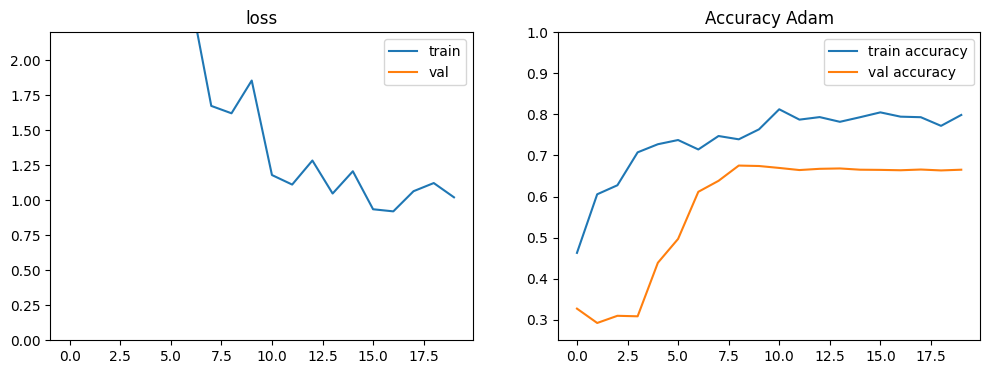

In [174]:
optimizer_str=str(K.eval(model.optimizer)).split(".")[-1].split()[0]

print("fit time with {} optimizer {} secs after {} epochs".format(optimizer_str, 
                                            (fit_end_time - fit_start_time), len(history.epoch)))

plot_history(history, optimizer_str)

In [175]:
import mlflow.sklearn

set_env_manual=True

if set_env_manual:
  os.environ['MODEL_TARGET'] = "mlflow"
  os.environ['MLFLOW_TRACKING_URI'] = "https://mlflow.lewagon.ai"
  os.environ['MLFLOW_EXPERIMENT'] = "ut_ds_prepro_ak"
  os.environ['MLFLOW_MODEL_NAME'] = id_str + "_" + optimizer_str
  os.environ['MLFLOW_STAGE'] = "staging"   

model_taget=os.environ.get("MODEL_TARGET")

if model_taget is None : model_taget=""

params = dict( optimizer=optimizer_str, 
               batch_size=batch_size,
               learning_rate=init_learning_rate,
               use_expo_decay=use_expo_decay,
               use_early_stop=use_early_stop)

metrics = dict(loss=loss, precision=precision, recall=recall, prc=prc )

if model_taget == "local" : 
   if save_model : 
      model.save("model_"+id_str)  
      print("model saved locally in {} dir".format(model_complexity))
   else:
      print("model is not saved")
elif model_taget == "mlflow" :
   try:
        print("save model to mlflow...")

        mlflow_tracking_uri = os.environ.get("MLFLOW_TRACKING_URI")
        mlflow_experiment = os.environ.get("MLFLOW_EXPERIMENT")
        mlflow_model_name = os.environ.get("MLFLOW_MODEL_NAME")
        
        if mlflow_tracking_uri != "" and mlflow_experiment != "" and mlflow_model_name != "" :
            mlflow.set_tracking_uri(mlflow_tracking_uri)
            mlflow.set_experiment(experiment_name=mlflow_experiment)

            with mlflow.start_run():                       
              if params is not None:
                  mlflow.log_params(params)

              if metrics is not None:
                  mlflow.log_metrics(metrics)

              if model is not None:
                  mlflow.keras.log_model(model, artifact_path="model",
                                         registered_model_name=mlflow_model_name)

            print("data saved to mlflow {} {} {} ok".format(mlflow_tracking_uri, mlflow_experiment, mlflow_model_name))
        else:
            print("mlflow env vars are missing or undefined...")
   except Exception as err:      
     print("error {} while saving model to mlflow".format(str(err)))

save model to mlflow...


INFO:tensorflow:Assets written to: /tmp/tmpp87set_7/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpp87set_7/model/data/model/assets
Successfully registered model '3sensors_win50_Adam'.
2022/12/03 04:18:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: 3sensors_win50_Adam, version 1


data saved to mlflow https://mlflow.lewagon.ai ut_ds_prepro_ak 3sensors_win50_Adam ok


Created version '1' of model '3sensors_win50_Adam'.
